# Main File For Project


In [1]:
#@author -Tejasvi Sharma
#GW Data Hacks _Hippo Hacks 04/13/2018
#First Part will be to Load the Data Set.

In [2]:
#packages required
from log import Logger
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set()


In [3]:
#Code to upload train and test file.
file_type=input("Enter the type of train and test file")
file_path_train=input("Enter the file name of train file")
file_path_test=input("Enter the file name of train file")
print("\n")

if( str.lower(file_type)=='csv' or str.lower(file_type)=='tsv' or str.lower(file_type)=='excel'):
#Loading the train file
    try:
        if(str.lower(file_type)=='csv'):
            df=pd.read_csv(file_path_train)
        elif(str.lower(file_type)=='tsv'):
            df=pd.read_csv(file_path_train,sep="    ")
        elif(str.lower(file_type)=='excel'):
            df=pd.read_excel(file_path_train)  
        print("Train File uploaded")
        target_column="readmitted"
        Logger.logger.info("Train File Uploaded")
    except Exception as e:
        print("Train File not Uploaded: Error")
        Logger.logger.error("Train File not found"+ " either file name or path is wrong")
        exit  #to stop execution
        
#Loading the test file
    try:
        if(str.lower(file_type)=='csv'):
            df_test=pd.read_csv(file_path_test)
        elif(str.lower(file_type)=='tsv'):
            df_test=pd.read_csv(file_path_test,sep="    ")
        elif(str.lower(file_type)=='excel'):
            df_test=pd.read_excel(file_path_test)  
        print("Test File uploaded")
        Logger.logger.info("Test File Uploaded")
    except Exception as e:
        print("Test File not Uploaded: Error")
        Logger.logger.error("Test File not found"+ " either file name or path is wrong")
        exit #to stop execution
    
    
else:
    print("File type not supported")
    exit # to stop execution
    

Enter the type of train and test filecsv
Enter the file name of train filetrain_data.csv
Enter the file name of train filetest_data.csv


Train File uploaded
Test File uploaded


# Data

In [4]:
#snapshot of data
df.head()

race  gender       age admission_type_id  \
0        Caucasian    Male   [70-80)         Emergency   
1        Caucasian    Male   [70-80)            Urgent   
2                ?  Female  [90-100)            Urgent   
3  AfricanAmerican    Male   [60-70)         Emergency   
4  AfricanAmerican  Female   [70-80)         Emergency   

                            discharge_disposition_id  admission_source_id  \
0                      Discharged/transferred to SNF       Emergency Room   
1                                 Discharged to home   Physician Referral   
2                                 Discharged to home   Physician Referral   
3                                 Discharged to home       Emergency Room   
4  Discharged/transferred to home with home healt...       Emergency Room   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 4                  50               0               19   
1                 1                  27               2               16   
2                11                  83               0               21   
3                 3                  46               0               13   
4                 2                  62               0               16   

     ...      metformin  glimepiride  glipizide  glyburide pioglitazone  \
0    ...         Steady           No         No         No           No   
1    ...             No           No         No     Steady           No   
2    ...             No       Steady         No         No           No   
3    ...             No           No         No         No           No   
4    ...             No       Steady         No         No       Steady   

  rosiglitazone insulin change diabetesMed readmitted  
0        Steady  Steady     Ch         Yes         No  
1            No  Steady     Ch         Yes        Yes  
2            No      No     No         Yes         No  
3            No      Up     Ch         Yes         No  
4            No  Steady     Ch         Yes         No  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 26 columns):
race                        71236 non-null object
gender                      71236 non-null object
age                         71236 non-null object
admission_type_id           67434 non-null object
discharge_disposition_id    68646 non-null object
admission_source_id         66459 non-null object
time_in_hospital            71236 non-null int64
num_lab_procedures          71236 non-null int64
num_procedures              71236 non-null int64
num_medications             71236 non-null int64
number_outpatient           71236 non-null int64
number_emergency            71236 non-null int64
number_inpatient            71236 non-null int64
number_diagnoses            71236 non-null int64
max_glu_serum               71236 non-null object
A1Cresult                   71236 non-null object
metformin                   71236 non-null object
glimepiride                 71236 non-null object

# Summary of the Data Set 

Summary for column RACE  




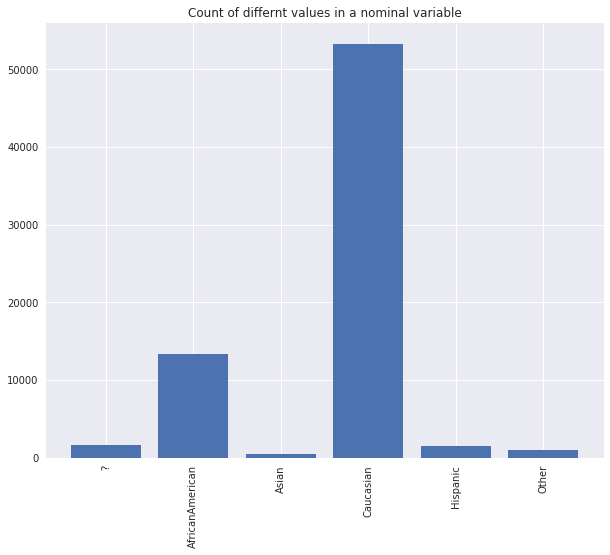

Summary for column GENDER  




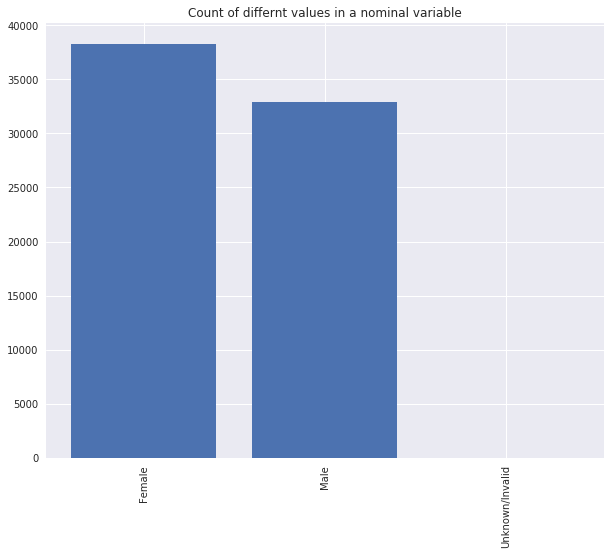

Summary for column AGE  




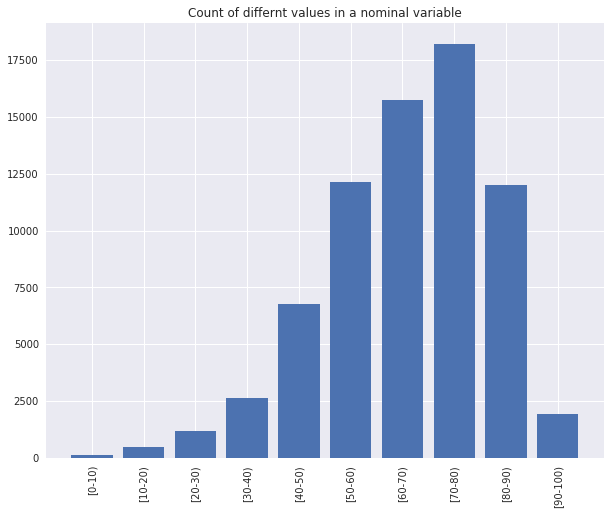

Summary for column ADMISSION_TYPE_ID  




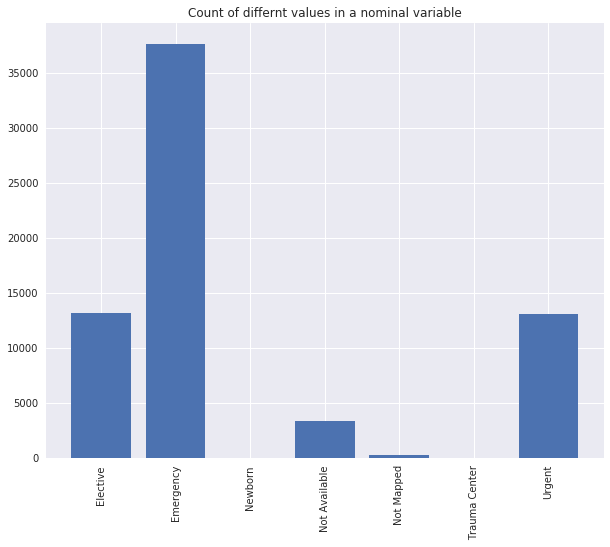

Summary for column DISCHARGE_DISPOSITION_ID  




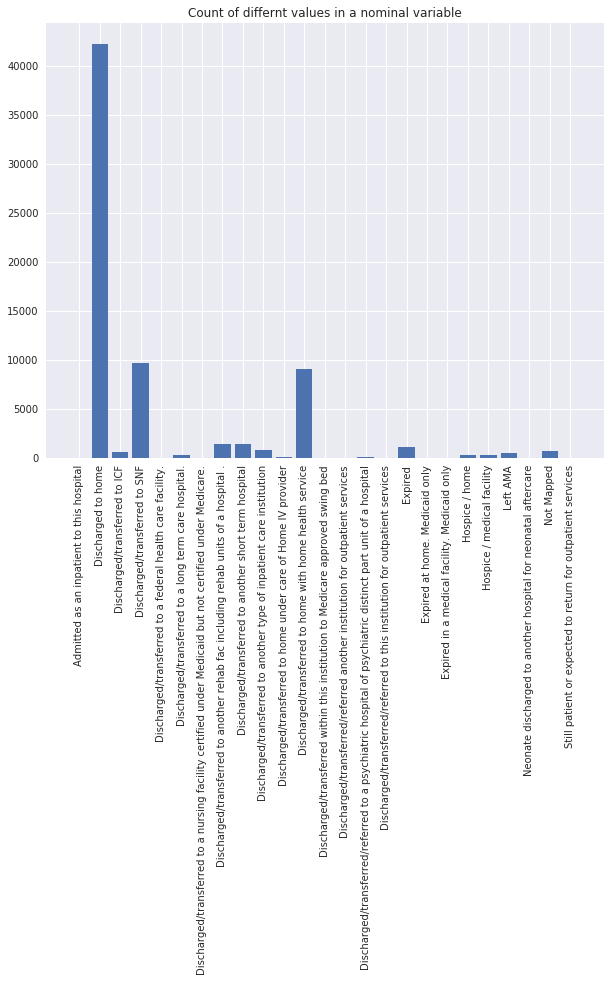

Summary for column ADMISSION_SOURCE_ID  




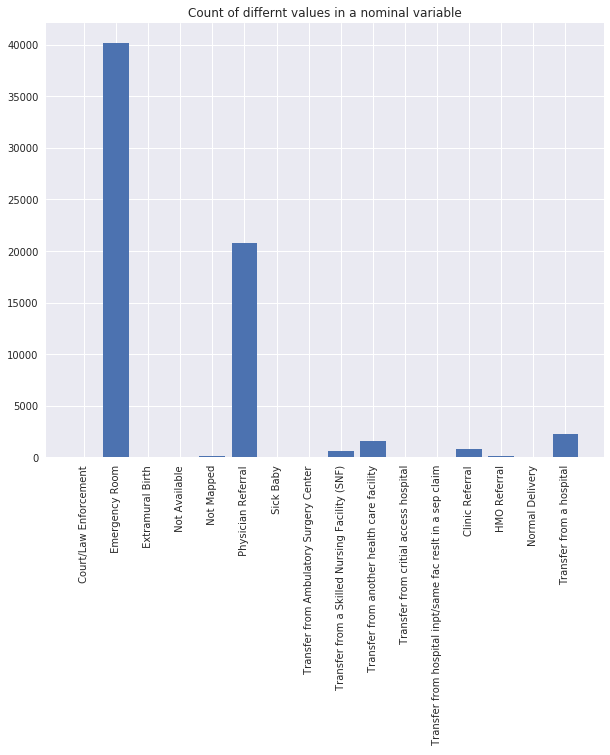

Summary statistics for column TIME_IN_HOSPITAL  


count    71236.000000
mean         4.397622
std          2.987375
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64
Unique values in Column are 14


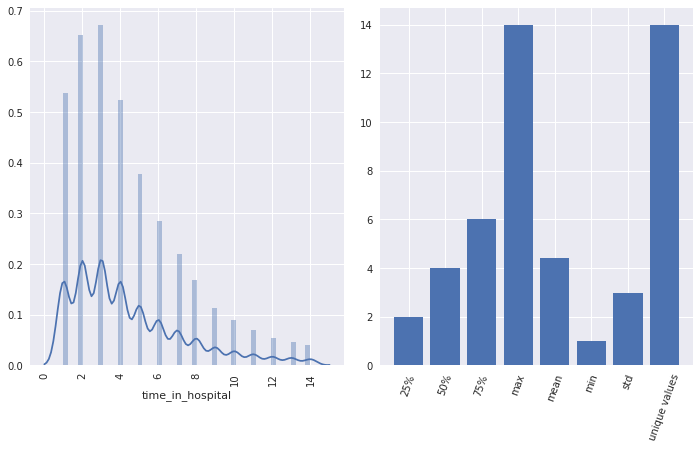

Summary statistics for column NUM_LAB_PROCEDURES  


count    71236.000000
mean        43.183250
std         19.665498
min          1.000000
25%         32.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64
Unique values in Column are 117


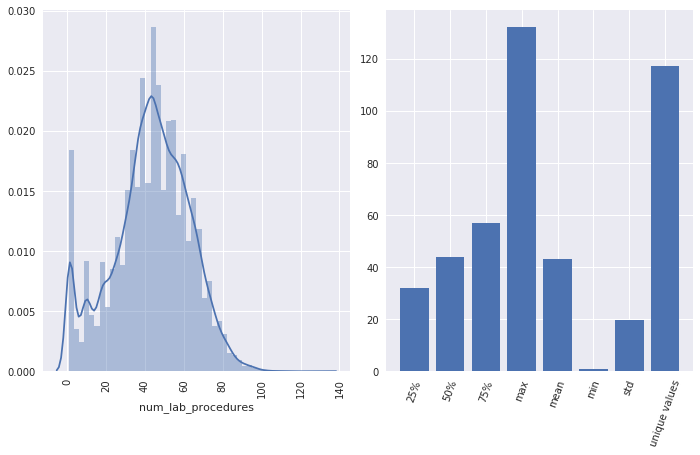

Summary statistics for column NUM_PROCEDURES  


count    71236.000000
mean         1.340811
std          1.704472
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: num_procedures, dtype: float64
Unique values in Column are 7


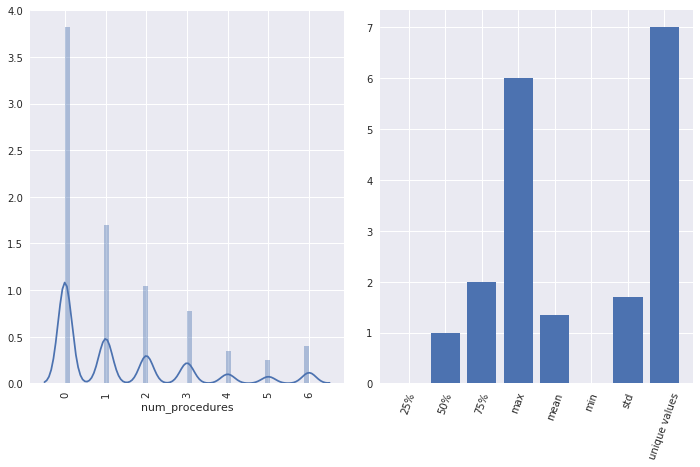

Summary statistics for column NUM_MEDICATIONS  


count    71236.000000
mean        16.021997
std          8.122857
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         79.000000
Name: num_medications, dtype: float64
Unique values in Column are 74


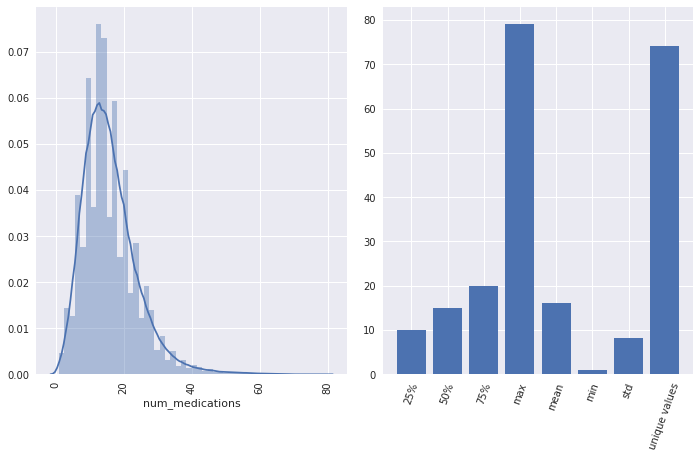

Summary statistics for column NUMBER_OUTPATIENT  


count    71236.000000
mean         0.364156
std          1.241570
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: number_outpatient, dtype: float64
Unique values in Column are 36


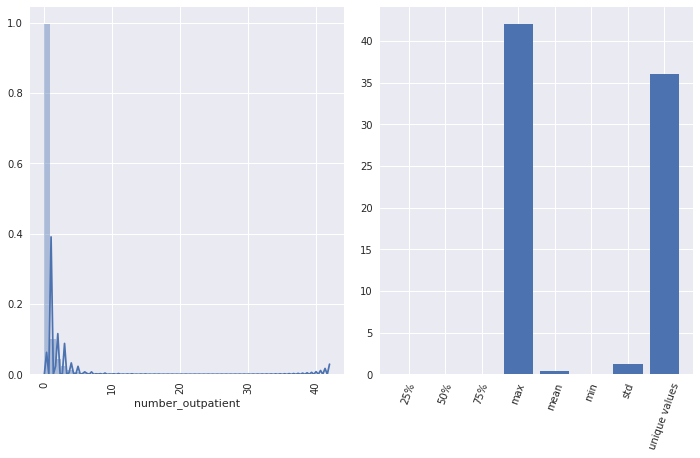

Summary statistics for column NUMBER_EMERGENCY  


count    71236.000000
mean         0.199085
std          0.940697
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: number_emergency, dtype: float64
Unique values in Column are 31


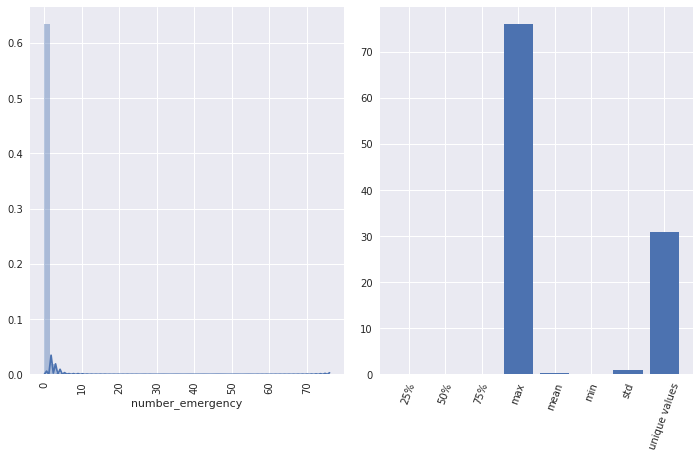

Summary statistics for column NUMBER_INPATIENT  


count    71236.000000
mean         0.640140
std          1.277819
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         21.000000
Name: number_inpatient, dtype: float64
Unique values in Column are 21


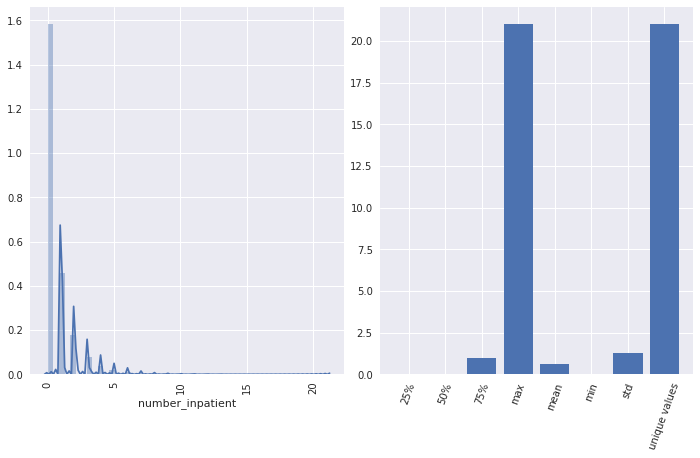

Summary statistics for column NUMBER_DIAGNOSES  


count    71236.000000
mean         7.420293
std          1.932229
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64
Unique values in Column are 16


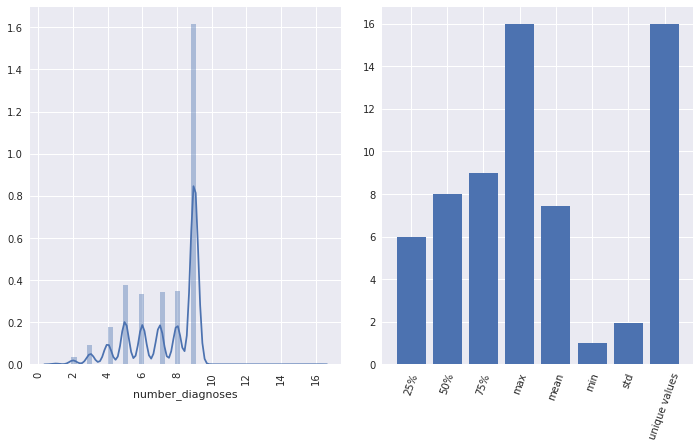

Summary for column MAX_GLU_SERUM  




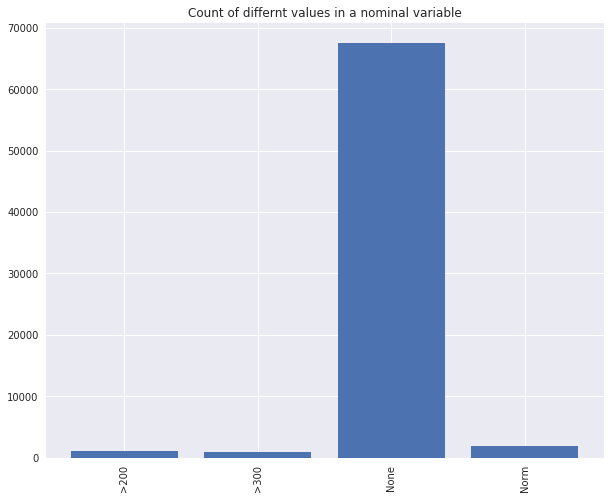

Summary for column A1CRESULT  




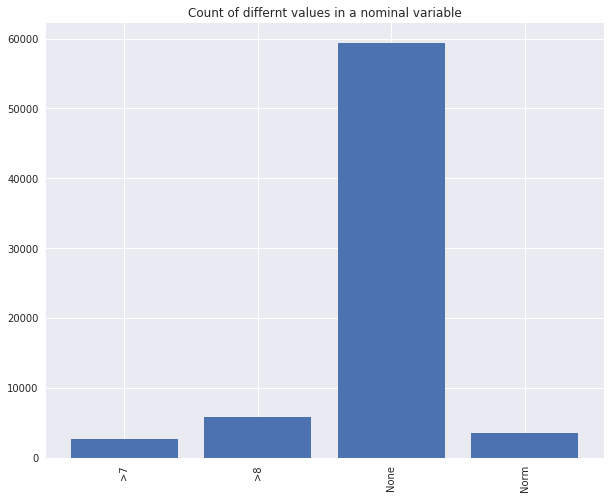

Summary for column METFORMIN  




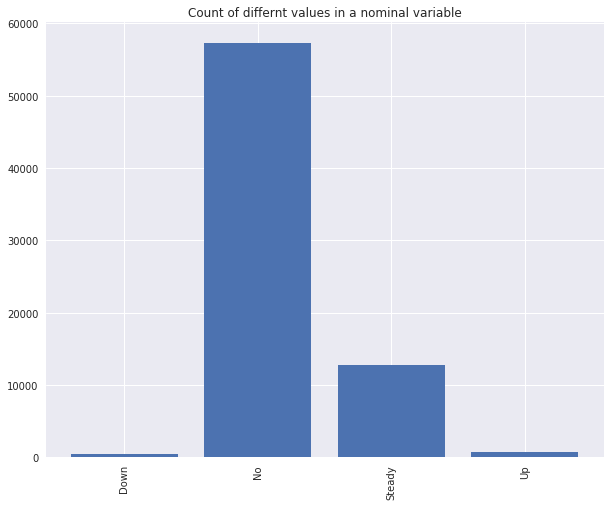

Summary for column GLIMEPIRIDE  




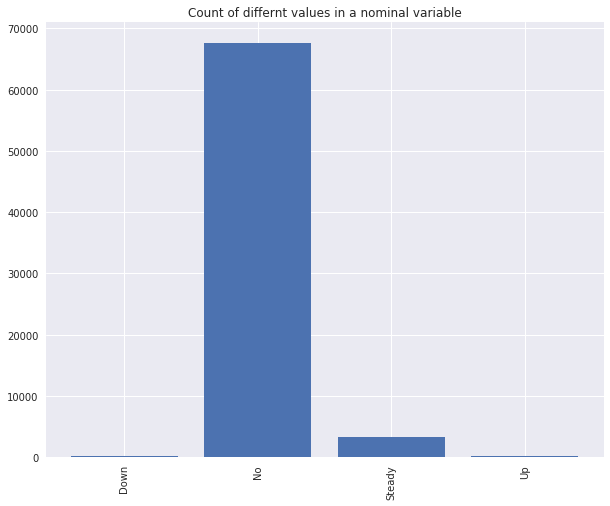

Summary for column GLIPIZIDE  




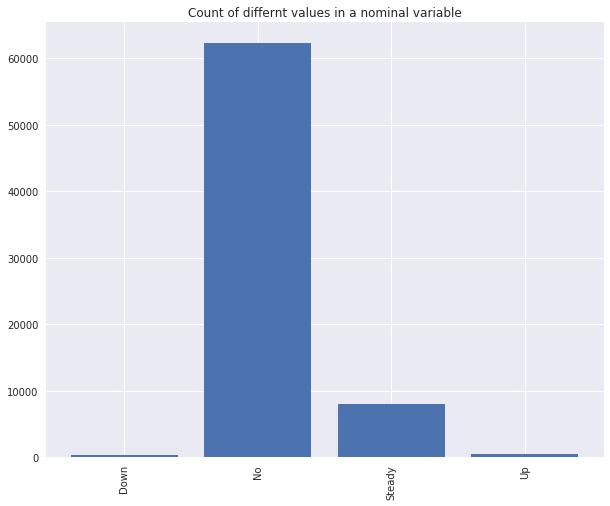

Summary for column GLYBURIDE  




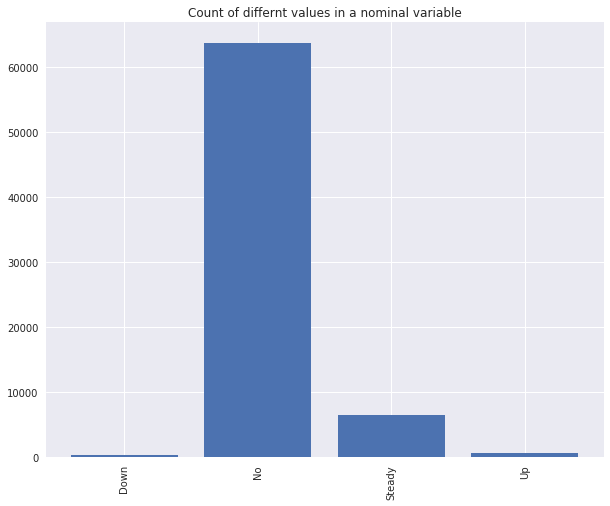

Summary for column PIOGLITAZONE  




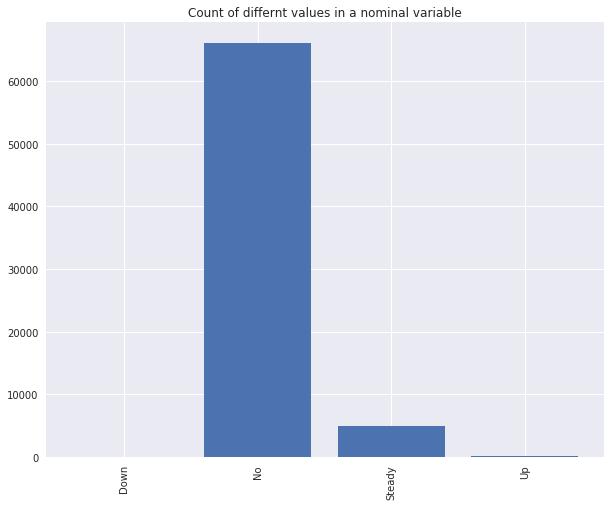

Summary for column ROSIGLITAZONE  




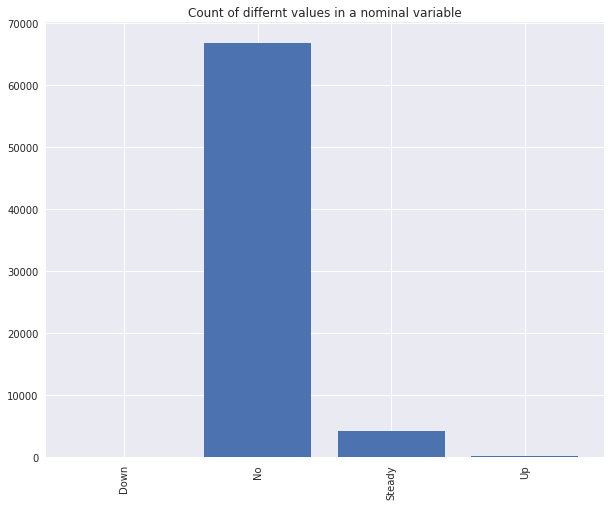

Summary for column INSULIN  




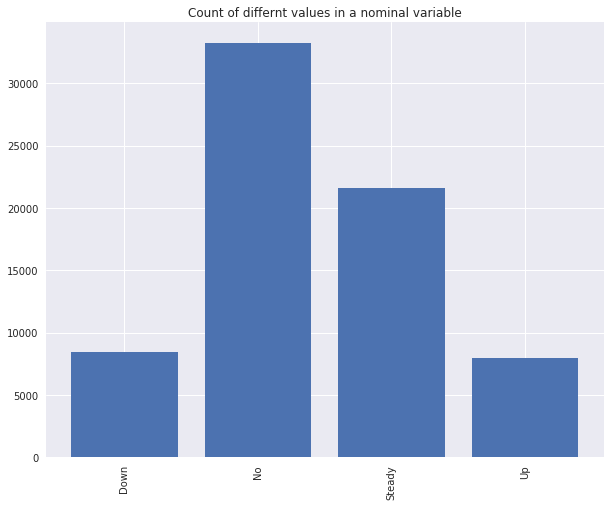

Summary for column CHANGE  




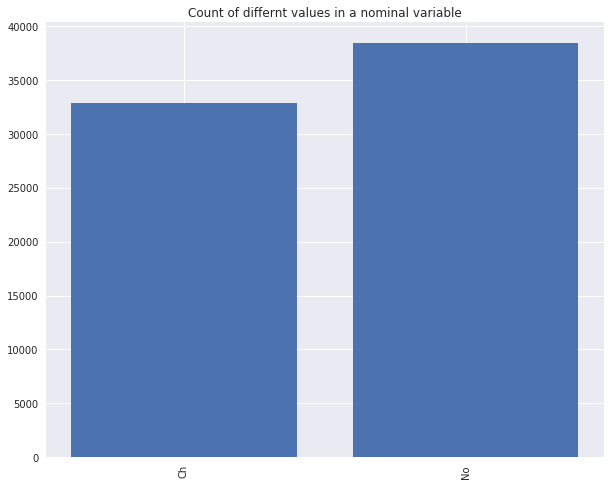

Summary for column DIABETESMED  




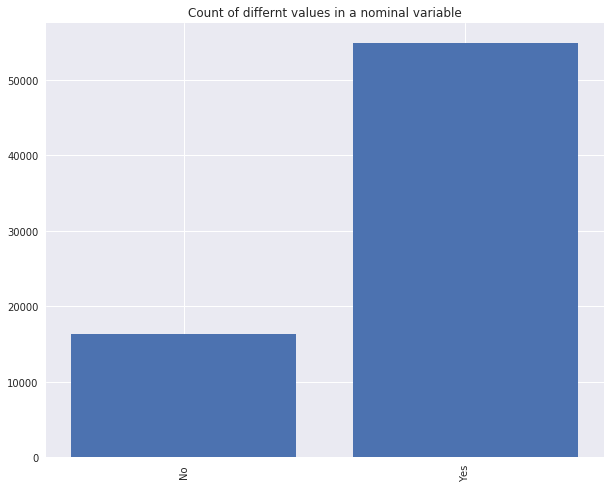

In [6]:
#We can also add graphs for different column
#For numerical, we will use histograms,line plot and histogram
#For categorical , data we will use count plot or bar plot
#Will print distinct values for objects and String values with unique values
#For numerical values it will print summary of the data, with unique counts
#Showing a Snapshot of Data Set
data_types=df.dtypes # a series which has the data type for every column
Col_type={} #to store the type of Column, whether that column is Cat or Cont
#Show the summary of the data
Logger.logger.info("Summary of the Data Set")
for i in [1,2]:
    for col in df.columns:
        try:
            if(col != target_column):
                if(data_types[col] == 'int64' or data_types[col] =='float64'):
                    print("Summary statistics for column "+str.upper(col)," ")
                    print("\n")
                    print(df[col].describe())
                    print("Unique values in Column are "+str(df[col].nunique()))
                    #adding unique value count to the summary
                    index_values=list(df[col].describe().index)
                    index_data=list(df[col].describe())
                    del index_data[index_values.index('count')] #deleting count values as they are redundant 
                    index_values.remove('count')
                    #adding unique values data to display
                    index_values.append('unique values')
                    index_data.append(df[col].nunique())

                    plt.figure(figsize=(10,6))
                    plt.subplot(1, 2, 1)
                    fig1=sns.distplot(df[col])
                    plt.xticks(rotation='vertical')
                    plt.subplot(1, 2, 2)
                    plt.tight_layout()
                    fig2=plt.bar(np.array(index_values),np.array(index_data))
                    #fig2=plt.bar(df[col].describe().index,df[col].describe())
                    plt.xticks(rotation=70)
                    plt.show()
                else:
                    print("Summary for column "+str.upper(col)," ")
                    df_group=df[[col,target_column]].groupby(col).count()
                    df_group.columns=['count']
                    plt.figure(figsize=(10,8))
                    plt.bar(df_group.index,df_group['count'])
                    print("\n")
                    plt.title("Count of differnt values in a nominal variable")
                    plt.xticks(rotation='vertical')
                    plt.show() #commented this to make code run faster
#                     Col_type[col]="cat" #made changes in these lines to debug code faster
#                     display.clear_output(wait=True) #made changes in these lines to debug code faster

                if(i==1):
                    typ=input("Tell the type of column that is whether the column is cont or cat , use only CAT and CONT")
                    Col_type[col]=typ 
                    display.clear_output(wait=True)
        except Exception as e:
                Logger.logger.error("error while creating graphs for column "+col)
                
Logger.logger.info("Summary of the Data Set completed")

        

# Data Cleaning

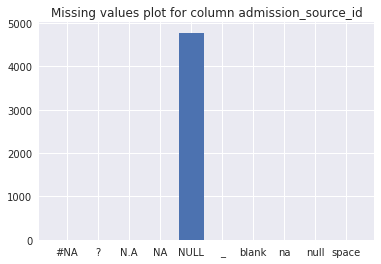

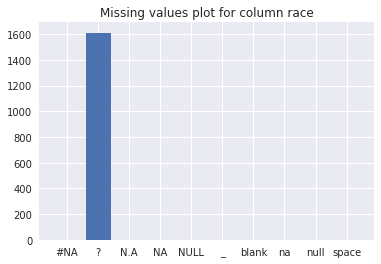

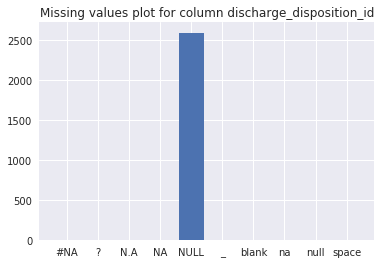

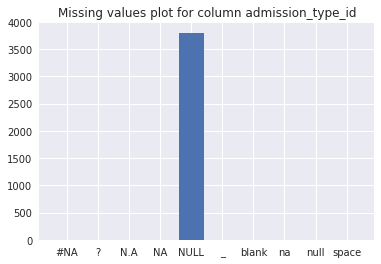

In [7]:
# For Train Data

#graph for missing values in every column
#checking for #NA,NA,whitespace,Blank(""),null,NULL,? in Cat Columns
#checking for na values in cont columns
missing_cat_col_list=[] #to save cat columns names  whith missing values
missing_cont_col_list=[] #to save cat columns names  whith missing values
missing_col_dict_values={}
Logger.logger.info("Statrted module to find out missing data in train data")
for col,typ in Col_type.items():
    try:
        if(str.lower(typ)=='cont'):
            count_null=df[col].isnull().sum()
            missing_col_dict_values[col]=count_null
            if(count_null == 0):
                pass
#                 print("Column {0} has no Missing Vlaues".format(col))
            else:
                missing_cont_col_list.append(col)
                plt.title("Missing values plot for column "+col)
                plt.plot(np.array([col]),np.array([count_null]))
                plt.show()
        elif(str.lower(typ)=='cat'):
            missing_values_dict={}
            missing_values_list=["NA","N.A","#NA"," ","","?","na","NULL","null","_"]
            for val in missing_values_list:
                if(val == "" or val == " " ):
                    if(val==""):
                        c_name="blank"
                    else:
                        c_name="space"
                    missing_values_dict[c_name]=df[df[col]  == val].shape[0]
                elif(val=="NULL"):
                    missing_values_dict[val]=df[col].isnull().sum()
                else:
                    missing_values_dict[val]=df[df[col]  == val].shape[0]
            keys_list=list(missing_values_dict.keys())
            values_list=list(missing_values_dict.values())
            if(sum(values_list)!=0):
                missing_col_dict_values[col]=sum(values_list)
                missing_cat_col_list.append(col)
                plt.title("Missing values plot for column "+col)
                plt.bar(np.array(keys_list),np.array(values_list))
                plt.show()
            else:
                missing_col_dict_values[col]=0
                #print("Column {0} has no Missing Vlaues".format(col)) 
        else:
            print("Column {0} has type None".format(col)) 
                
    except Exception as e:
        print(e)
        Logger.logger.error("Error while making graph for missing value in column "+col)
        

Logger.logger.info("Module to find out missing data in train data completed")


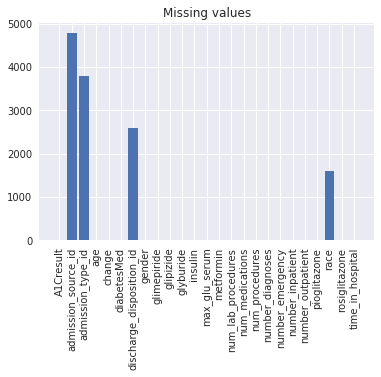

In [8]:
#combined missing Data Graph for train_data
missing_col_dict_values
plt.title("Missing values")
plt.bar(np.array(list(missing_col_dict_values.keys())),np.array(list(missing_col_dict_values.values())))
plt.xticks(rotation='vertical')
plt.show()

Column number_inpatient has no Missing Vlaues
Column time_in_hospital has no Missing Vlaues


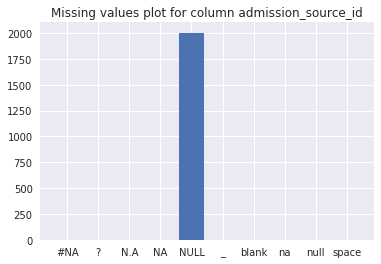

Column number_emergency has no Missing Vlaues
Column num_lab_procedures has no Missing Vlaues
Column num_procedures has no Missing Vlaues


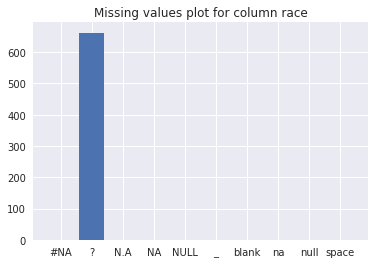

Column number_outpatient has no Missing Vlaues


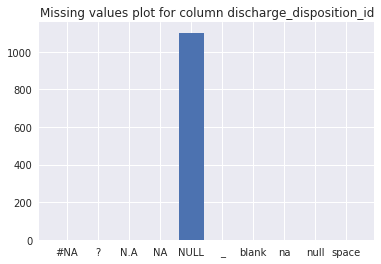

Column num_medications has no Missing Vlaues
Column number_diagnoses has no Missing Vlaues


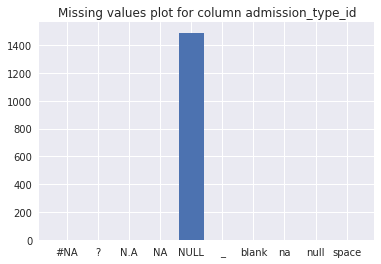

In [9]:
# For Test Data

#graph for missing values in every column
#checking for #NA,NA,whitespace,Blank(""),null,NULL,? in Cat Columns
#checking for na values in cont columns
missing_cat_col_list_test=[] #to save cat columns names  whith missing values
missing_cont_col_list_test=[] #to save cat columns names  whith missing values
missing_col_dict_values_test={}
Logger.logger.info("Statrted module to find out missing data in test data")
for col,typ in Col_type.items():
    try:
        if(str.lower(typ)=='cont'):
            count_null=df[col].isnull().sum()
            missing_col_dict_values_test[col]=count_null
            if(count_null == 0):
                print("Column {0} has no Missing Vlaues".format(col))
            else:
                missing_cont_col_list_test.append(col)
                plt.title("Missing values plot for column "+col)
                plt.plot(np.array([col]),np.array([count_null]))
                plt.show()
        elif(str.lower(typ)=='cat'):
            missing_values_dict_test={}
            missing_values_list=["NA","N.A","#NA"," ","","?","na","NULL","null","_"]
            for val in missing_values_list:
                if(val == "" or val == " " ):
                    if(val==""):
                        c_name="blank"
                    else:
                        c_name="space"
                    missing_values_dict_test[c_name]=df_test[df_test[col]  == val].shape[0]
                elif(val=="NULL"):
                    missing_values_dict_test[val]=df_test[col].isnull().sum()
                else:
                    missing_values_dict_test[val]=df_test[df_test[col]  == val].shape[0]
            keys_list=list(missing_values_dict_test.keys())
            values_list=list(missing_values_dict_test.values())
            missing_col_dict_values_test[col]=sum(values_list)
            if(sum(values_list)!=0):
                missing_cat_col_list_test.append(col)
                plt.title("Missing values plot for column "+col)
                plt.bar(np.array(keys_list),np.array(values_list))
                plt.show()
            else:
                missing_col_dict_values_test[col]=0
                #print("Column {0} has no Missing Vlaues".format(col))
        else:
            pass
            #print("Column {0} has format None".format(col)) 
    except Exception as e:
        print(e)
        Logger.logger.error("Error while making graph for missing value in column "+col)
        


Logger.logger.info("Module to find out missing data in test data")

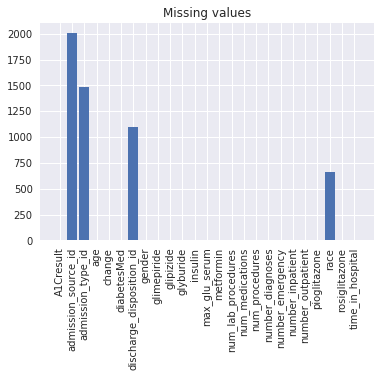

In [10]:
#graph for missing values in Test Data
#print(missing_col_dict_values_test)
plt.title("Missing values")
plt.bar(np.array(list(missing_col_dict_values_test.keys())),np.array(list(missing_col_dict_values_test.values())))
plt.xticks(rotation='vertical')
plt.show()

# Imputing values

In [11]:
#@function purpose -> to create imputer objects for columns with missing data values and return those objects, Only for cat columns
# @param train_data, data on which the imputer will learn
# @param col_list, columns with missing data
# @param col_list_dict, dict which has the type for every column
# @param missing_values_list, has the list of data which might be in place of missing data, we will impute these values
missing_values_list=["NA","N.A","#NA"," ",""," ?","na","NULL","null","_"]

#@param train_data, data to be cleaned
#@param col_list, list of columns to be cleaned
#@param col_list_dict, 
def Impute_train_cat(train_data,col_list,col_list_dict):
    impute_dict={}
    for col in col_list:
        if(str.lower(col_list_dict[col]) == 'cat'):
            most_frequent=train_data[col].value_counts().idxmax()
            impute_dict[col]=most_frequent
    
    return(impute_dict)
              
    
def Impute_transform_cat(test_data,col_list,col_list_dict,impute_dict):
    imp_object_list=[]
    for col in col_list:
        if(str.lower(col_list_dict[col]) == 'cat'):
            most_common=impute_dict[col]
#             print(most_common)
            def replace_most_common(x):
                if x in missing_values_list:
                    return most_common
                else:
                    return x
            test_data[col]= test_data[col].fillna(most_common)
            test_data[col]= test_data[col].map(replace_most_common)
   
            
    return(test_data)
            
#tested working, imputing data values   

In [12]:
#Making a copy of data, to remove rows with missing data
df_train_copy=pd.DataFrame.copy(df)
df_test_copy=pd.DataFrame.copy(df_test)

In [13]:
#will build two pipelines one on model with imputed data and one with after removing missing rows
#module to return impute model on train data
#using mode on categorical data
#will call the impute module to impute data and clean module to remove the rows with missing data, impute model will only 
#provide model, for every column,we will add the objects to pipeline
#print(missing_cat_col_list)
#loop for column with cat values to create a model to impute values with missing values.
impute_model_cat=[] # to save impute models of cat columns
Logger.logger.info("Module to impute missing data in train and test data in categorical columns")
impute_model_cat.append(Impute_train_cat(df,missing_cat_col_list,Col_type))

#to apply transformation on train and test data.
#applying transformation on train Data
df_train_imputed=Impute_transform_cat(df,missing_cat_col_list,Col_type,impute_model_cat[0])
#applying transformation in test Data
df_test_imputed=Impute_transform_cat(df_test,missing_cat_col_list,Col_type,impute_model_cat[0])
Logger.logger.info("Module to impute missing data in train and test data in categorical data completed")
    



In [14]:
df_train_imputed


race  gender       age admission_type_id  \
0            Caucasian    Male   [70-80)         Emergency   
1            Caucasian    Male   [70-80)            Urgent   
2                    ?  Female  [90-100)            Urgent   
3      AfricanAmerican    Male   [60-70)         Emergency   
4      AfricanAmerican  Female   [70-80)         Emergency   
5            Caucasian  Female   [80-90)            Urgent   
6            Caucasian  Female   [80-90)         Emergency   
7      AfricanAmerican    Male   [40-50)         Emergency   
8            Caucasian  Female   [50-60)            Urgent   
9            Caucasian    Male   [40-50)            Urgent   
10           Caucasian    Male   [60-70)          Elective   
11           Caucasian    Male   [30-40)          Elective   
12           Caucasian  Female   [80-90)         Emergency   
13           Caucasian    Male   [70-80)         Emergency   
14           Caucasian  Female   [60-70)         Emergency   
15     AfricanAmerican    Male   [50-60)         Emergency   
16           Caucasian    Male   [60-70)            Urgent   
17     AfricanAmerican  Female   [80-90)         Emergency   
18               Other    Male   [70-80)         Emergency   
19           Caucasian    Male   [40-50)         Emergency   
20           Caucasian    Male   [60-70)         Emergency   
21               Other  Female   [80-90)         Emergency   
22           Caucasian  Female   [60-70)     Not Available   
23           Caucasian  Female   [70-80)     Not Available   
24           Caucasian    Male   [80-90)            Urgent   
25           Caucasian  Female   [70-80)         Emergency   
26           Caucasian    Male   [70-80)         Emergency   
27           Caucasian    Male   [70-80)     Not Available   
28           Caucasian  Female   [70-80)            Urgent   
29     AfricanAmerican    Male   [60-70)         Emergency   
...                ...     ...       ...               ...   
71206  AfricanAmerican  Female   [70-80)         Emergency   
71207        Caucasian  Female   [40-50)         Emergency   
71208        Caucasian    Male   [60-70)         Emergency   
71209        Caucasian  Female  [90-100)         Emergency   
71210  AfricanAmerican  Female   [50-60)         Emergency   
71211  AfricanAmerican    Male   [50-60)         Emergency   
71212        Caucasian  Female   [70-80)         Emergency   
71213        Caucasian    Male   [60-70)            Urgent   
71214            Other    Male   [70-80)            Urgent   
71215            Asian    Male   [70-80)         Emergency   
71216        Caucasian  Female   [80-90)         Emergency   
71217        Caucasian    Male   [70-80)          Elective   
71218        Caucasian    Male   [60-70)         Emergency   
71219        Caucasian  Female   [70-80)          Elective   
71220        Caucasian  Female   [80-90)         Emergency   
71221  AfricanAmerican    Male   [70-80)         Emergency   
71222        Caucasian  Female   [60-70)            Urgent   
71223        Caucasian    Male   [80-90)         Emergency   
71224        Caucasian  Female   [50-60)            Urgent   
71225  AfricanAmerican  Female   [60-70)          Elective   
71226        Caucasian  Female   [70-80)          Elective   
71227        Caucasian  Female   [80-90)          Elective   
71228  AfricanAmerican  Female   [60-70)            Urgent   
71229        Caucasian  Female   [80-90)         Emergency   
71230        Caucasian  Female   [50-60)         Emergency   
71231        Caucasian  Female   [50-60)            Urgent   
71232        Caucasian    Male   [40-50)          Elective   
71233        Caucasian    Male   [50-60)         Emergency   
71234        Caucasian  Female   [40-50)         Emergency   
71235        Caucasian  Female   [60-70)          Elective   

                                discharge_disposition_id  \
0                          Discharged/transferred to SNF   
1                                     Discharged to h

# Imputing continuous data, if any continuous column has a missing value 


In [15]:
#creating Imputer to remove Nan values from the dataset
#It only works when some column is missing any data values
Logger.logger.info("Module to impute missing data in train and test data in continuous data")
try:
    if(len(missing_cont_col_list)!=0):
        for col_name in missing_cont_col_list:
            imp=Imputer(missing_values=np.nan,strategy="median",axis=0)
            imp.fit(df_train_imputed[col_name])
            df_train_imputed[col_name]=imp.transform(df_train_imputed[[col_name]]).ravel()
            df_test_imputed[col_name]=imp.transform(df_test_imputed[[col_name]]).ravel()
except Exception as e:
        print(e)
        Logger.logger.error("Error while imputing continuous Data columns")

Logger.logger.info("Module to impute missing data in train and test data in continuius data completed")


   # Exploring how columns affect readmission

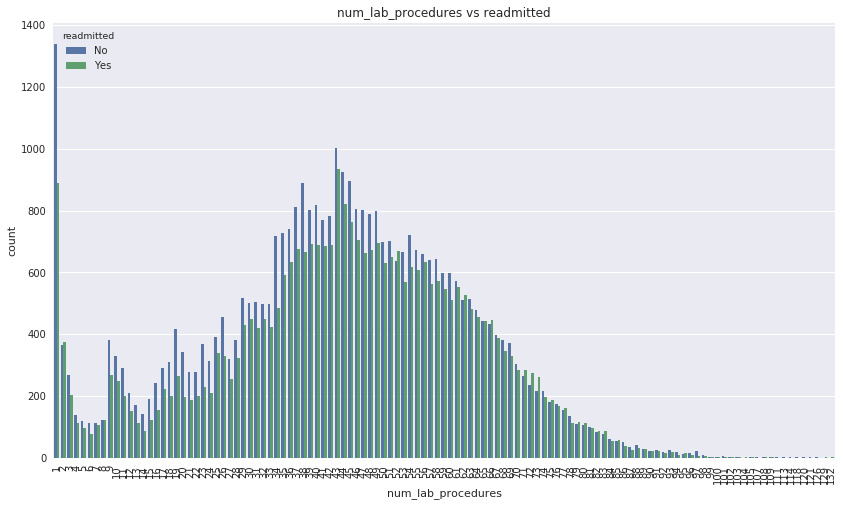

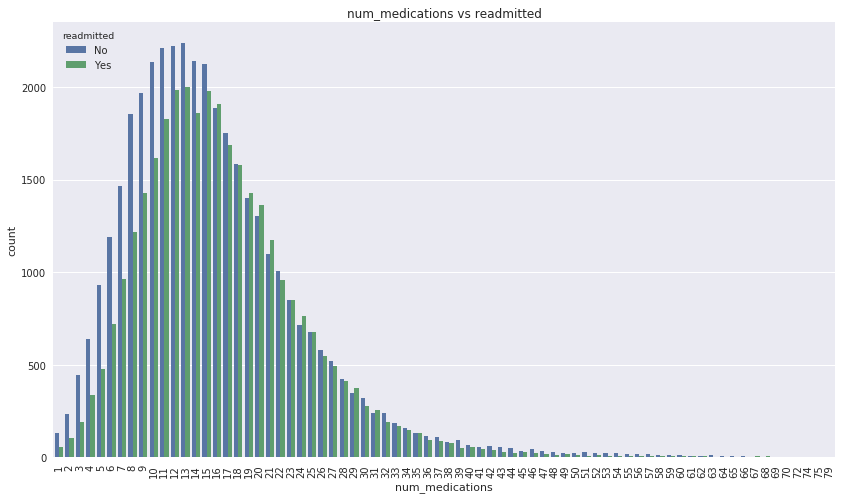

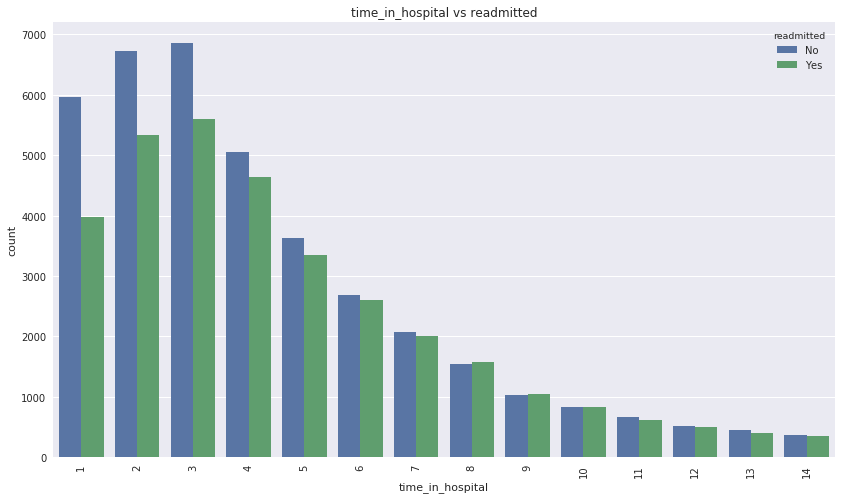

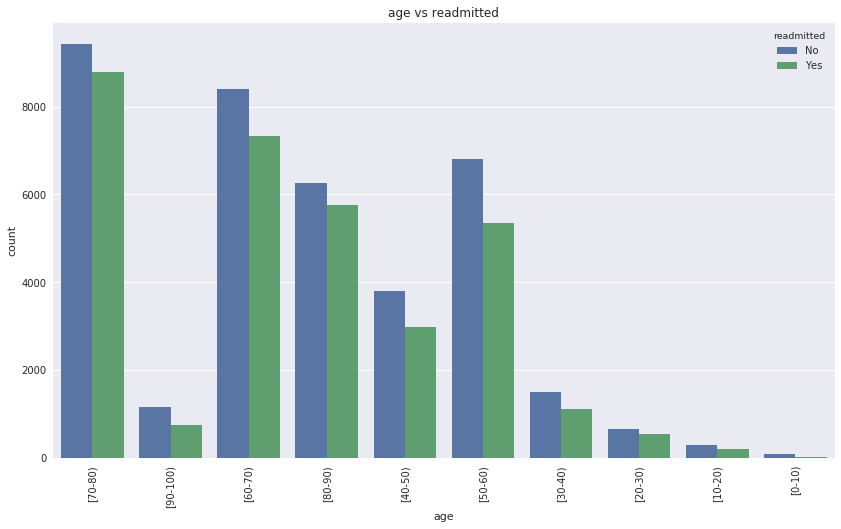

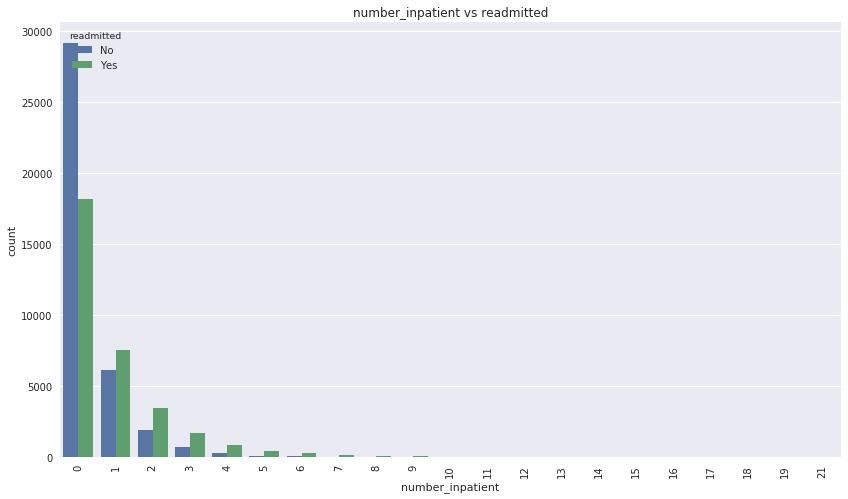

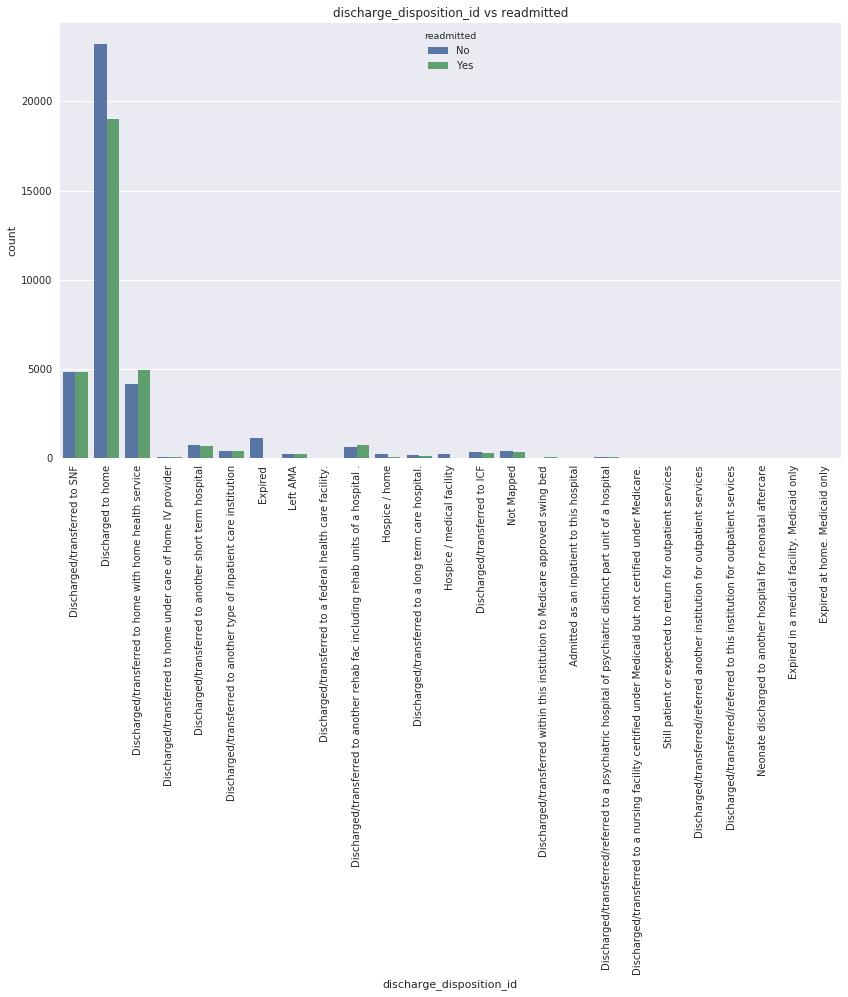

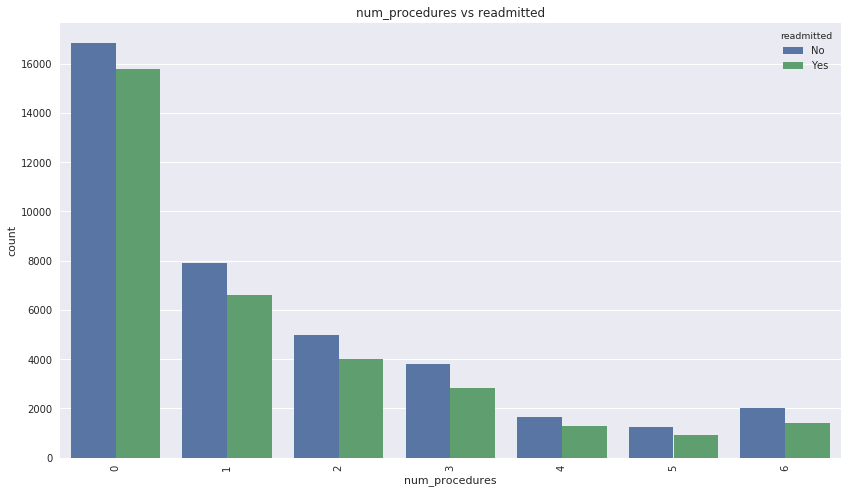

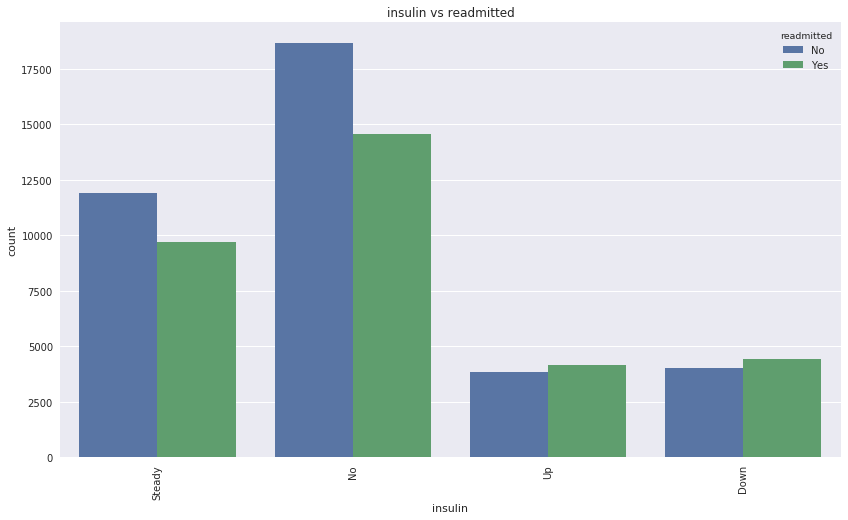

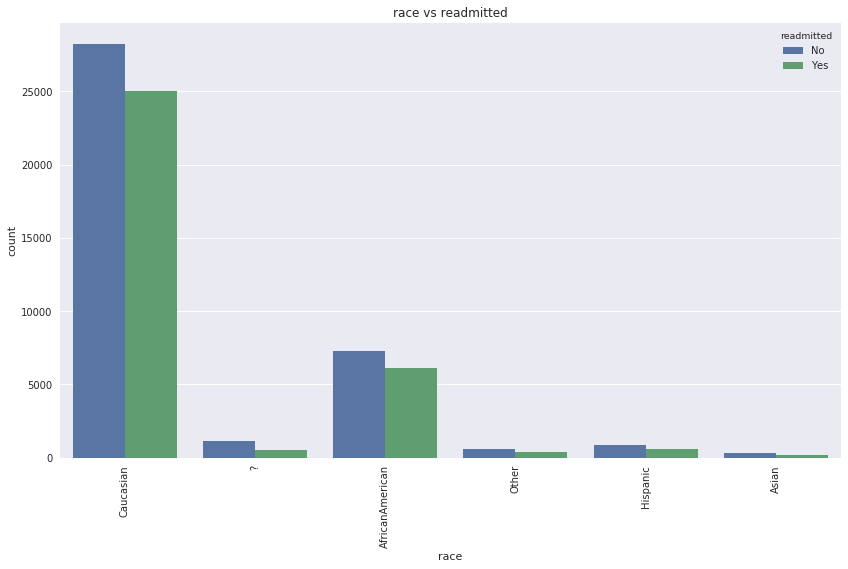

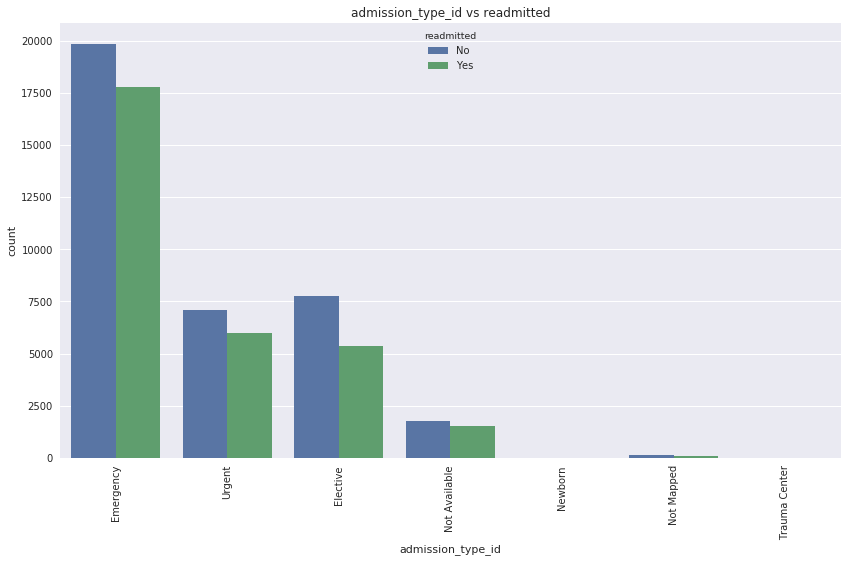

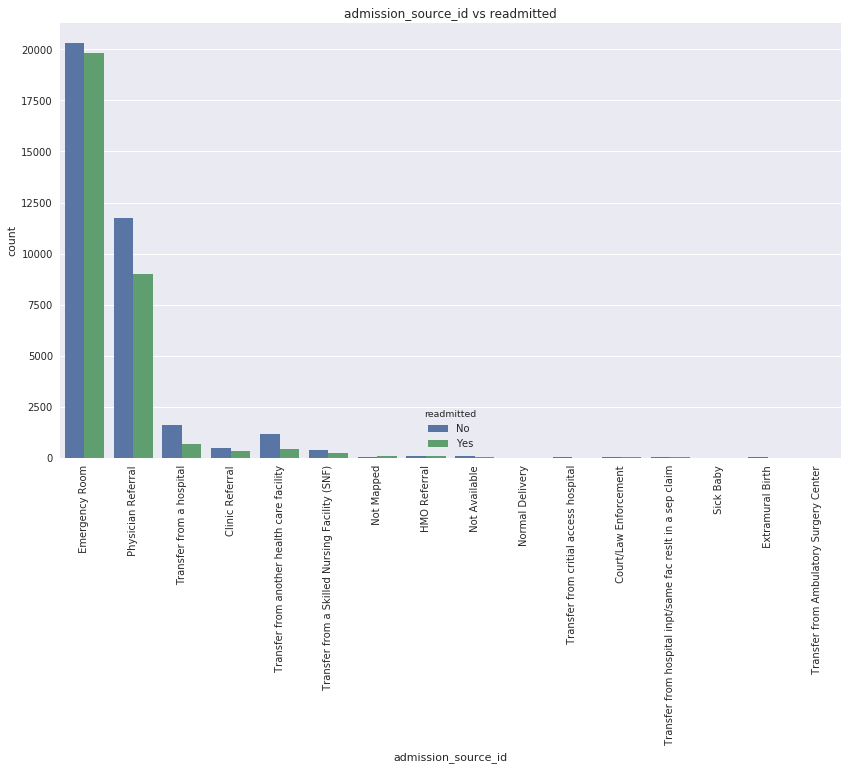

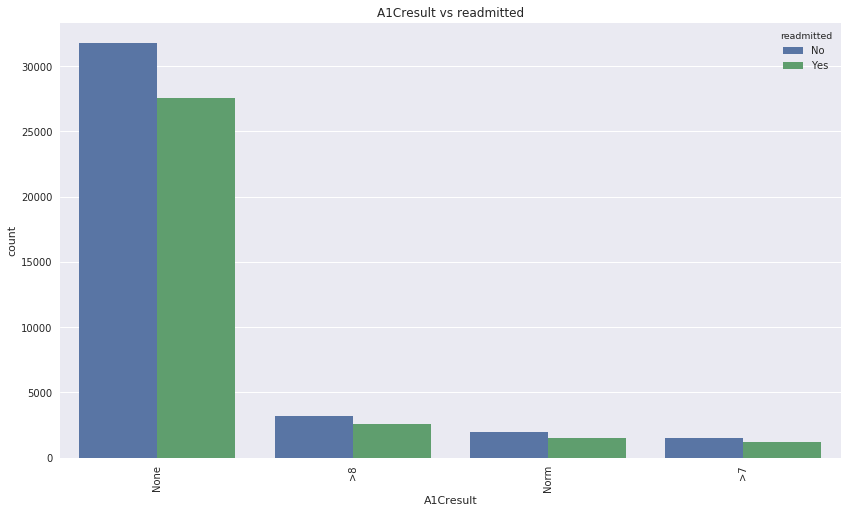

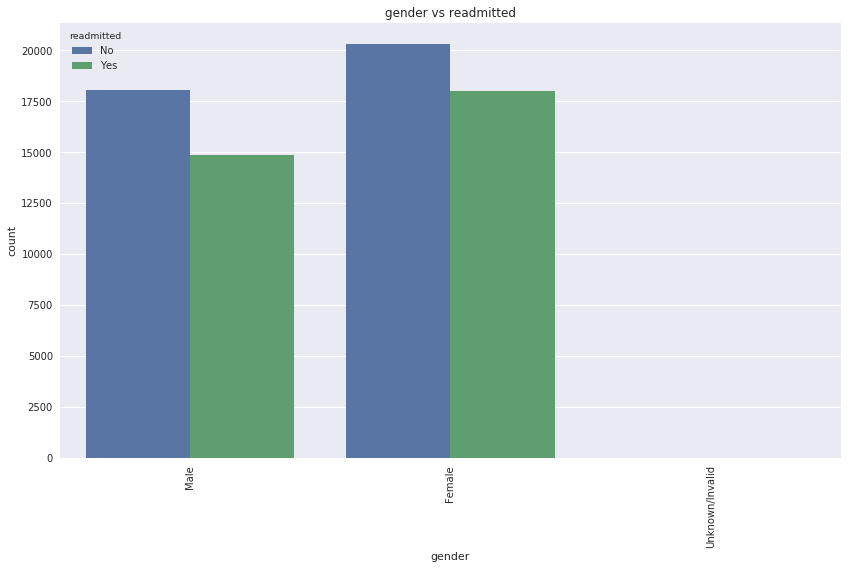

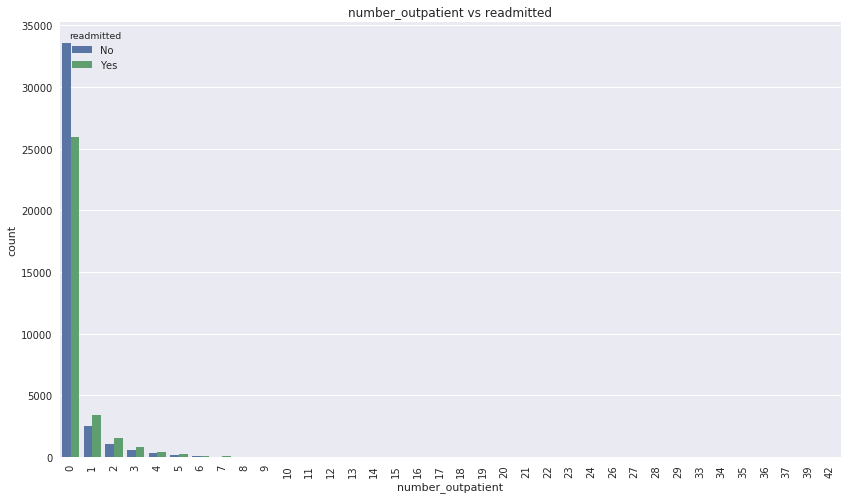

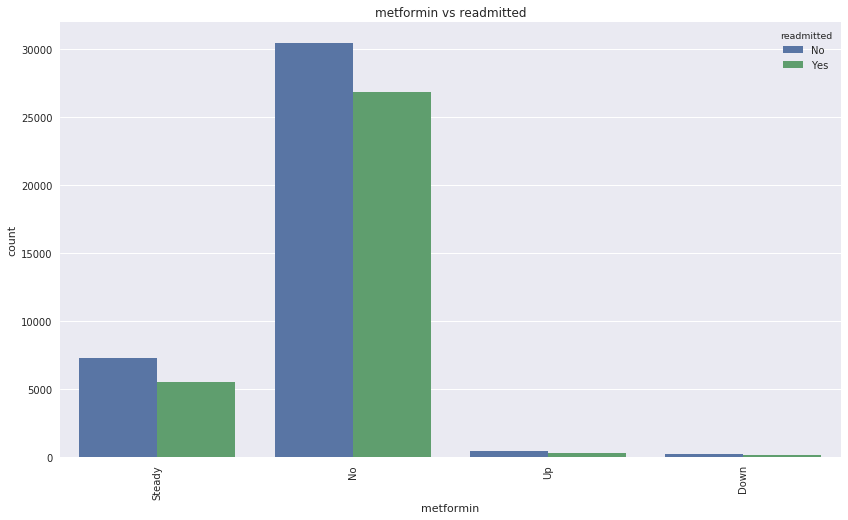

In [16]:
# #explore the important columns
imp_columns=['num_lab_procedures','num_medications','time_in_hospital','age','number_inpatient','discharge_disposition_id','num_procedures','insulin','race','admission_type_id','admission_source_id','A1Cresult','gender','number_outpatient','metformin']
# #sns.swarmplot(x="income", y="workclass", data=df_train_imputed)

for i in imp_columns:
    plt.figure(figsize=(14,8))
    plt.title(i+" vs "+target_column)
    sns.countplot(x=i,data=df_train_copy,hue=target_column)
    plt.xticks(rotation="vertical")
    plt.show()



# Removing rows with missing values in Copy of Train and Test Data

In [17]:
Logger.logger.info("Module to remove rows with missing data")
#also write code to remove nan
df_train_copy=df_train_copy.dropna()
df_test_copy=df_test_copy.dropna()

#code to remove missing rows from copy of train and test data
for col_name in missing_cat_col_list:
    for value in missing_values_list:
        df_train_copy=df_train_copy[df_train_copy[col_name] !=  value]
        df_test_copy=df_test_copy[df_test_copy[col_name] !=  value]

print("Shape of train and test data after removing rows with missing values")
print(df_train_copy.shape)
print(df_test_copy.shape)
# a graph to show the how many rows were removed from train and test data
Logger.logger.info("Module to remove rows with missing data completed")




Shape of train and test data after removing rows with missing values
(62186, 26)
(26786, 26)


# Encoding categorical values

In [18]:
#Will develop preprocessing module to preprocess data according to the type data, this module will only-
#-create objects to preprocess data for all the column and return a list of objects which we can add to a pipeline
# Label encoding with sklearn's LabelEncoder
#we can encode both the imputed data and not imputed data with a single model as categorical values in every cat column are same
#- so we do it
Logger.logger.info("Module to encode Categorical values")
try:
    for col,typ in Col_type.items():
        if(str.lower(typ)=='cat'):
#             print(col)
            class_le = LabelEncoder()
            fir_data=pd.concat([df_train_imputed,df_test_imputed])
            class_le.fit(fir_data[col].values) #training with train data
            df_train_imputed[col]=class_le.transform(df_train_imputed[col]) #transforming the train data
            df_test_imputed[col]=class_le.transform(df_test_imputed[col]) #transforming the test data using train data
#             print(col)
            #encoding the train and test data with rows removed with missing data
            df_train_copy[col]=class_le.transform(df_train_copy[col]) #transforming the train data
            df_test_copy[col]=class_le.transform(df_test_copy[col]) #transforming the test data using train data

except Exception as e:
        print(e)
        Logger.logger.error("Error while encoding categorical Data columns")        
Logger.logger.info("Module to encode Categorical values completed")

In [19]:
Col_type.items()


dict_items([('number_inpatient', 'cont'), ('glyburide', 'cat'), ('glimepiride', 'cat'), ('time_in_hospital', 'cont'), ('age', 'cat'), ('change', 'cat'), ('diabetesMed', 'cat'), ('admission_source_id', 'cat'), ('pioglitazone', 'cat'), ('max_glu_serum', 'cat'), ('number_emergency', 'cont'), ('num_lab_procedures', 'cont'), ('gender', 'cat'), ('num_procedures', 'cont'), ('race', 'cat'), ('number_outpatient', 'cont'), ('glipizide', 'cat'), ('discharge_disposition_id', 'cat'), ('num_medications', 'cont'), ('rosiglitazone', 'cat'), ('metformin', 'cat'), ('number_diagnoses', 'cont'), ('admission_type_id', 'cat'), ('A1Cresult', 'cat'), ('insulin', 'cat')])

# Correlation Plot

In [20]:
# #Code for correlation plot
# # Get Pearson product-moment correlation coefficients
# cm = np.corrcoef(df_train_copy.values.T)

# # Get heat map
# plt.figure(figsize=(12,12))
# hm = sns.heatmap(cm,
#                  cbar=True,
#                  annot=True,
#                  square=True,
#                  fmt='.2f',
#                  annot_kws={'size': 15},
#                  yticklabels=df_train_copy.columns,
#                  xticklabels=df_train_copy.columns)

# # Show heat map
# plt.tight_layout()
# plt.show()

# Scaling Continuous Data

In [21]:
#For imputed Data
#preprocessing continuous data, using Standard Scaler
#Using cont columns only
try:
    for col,typ in Col_type.items():
        if(str.lower(typ)=='cont'):
            scale = StandardScaler()
            if(max(df_train_imputed[col])>20):
                scale.fit(df_train_imputed[[col]]) #training with train data
                df_train_imputed[col]=scale.transform(df_train_imputed[[col]]) #transforming the train data
                df_test_imputed[col]=scale.transform(df_test_imputed[[col]]) #transforming the test data using train data

    #For imputed data with rows removed with missing values
    #preprocessing continuous data, using Standard Scaler
    #Using cont columns only
    for col,typ in Col_type.items():
        if(str.lower(typ)=='cont'):
            scale1 = StandardScaler()
            if(max(df_train_copy[col])>20):
                scale1.fit(df_train_copy[[col]]) #training with train data
                 #encoding the train and test data with rows removed with missing data
                df_train_copy[col]=scale1.transform(df_train_copy[[col]]) #transforming the train data
                df_test_copy[col]=scale1.transform(df_test_copy[[col]]) #transforming the test data using train data
except Exception as e:
        print(e)
        Logger.logger.error("Error while scaling continuous Data columns")

# Creating dummy columns for categorical variables

In [22]:
#on hold as for I read on this link 
#https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931
#code to convert the encoded categorical columns to dummy variables
# for col,typ in Col_type.items():
#     if(str.lower(typ)=='cat'):
#         df5=pd.get_dummies(df_test_imputed[["workclass",'education']])

# Encoding Target Variable

In [23]:
#encoding our target variable
target_values=list(df_train_imputed[target_column].unique())
target_column_mapping_train=dict([(target_values[i],i) for i in range(len(target_values))])
target_column_mapping_test=dict([((target_values[i]),i) for i in range(len(target_values))])

#transforming target column, i.e encoding target column, binary data
#encoding imputed Data
df_test_imputed[target_column]=df_test_imputed[target_column].map(target_column_mapping_test)
df_train_imputed[target_column]=df_train_imputed[target_column].map(target_column_mapping_train)

#encoding Non imputed Data

df_test_copy[target_column]=df_test_copy[target_column].map(target_column_mapping_test)
df_train_copy[target_column]=df_train_copy[target_column].map(target_column_mapping_train)

In [24]:
# to create a list with the columns required for model creation
{k: v for k, v in Col_type.items() if v[0]!= "None"}

filtered_columns=list(Col_type.keys())
filtered_columns.append(target_column)
#filtered_columns

# Implementing Random Forest

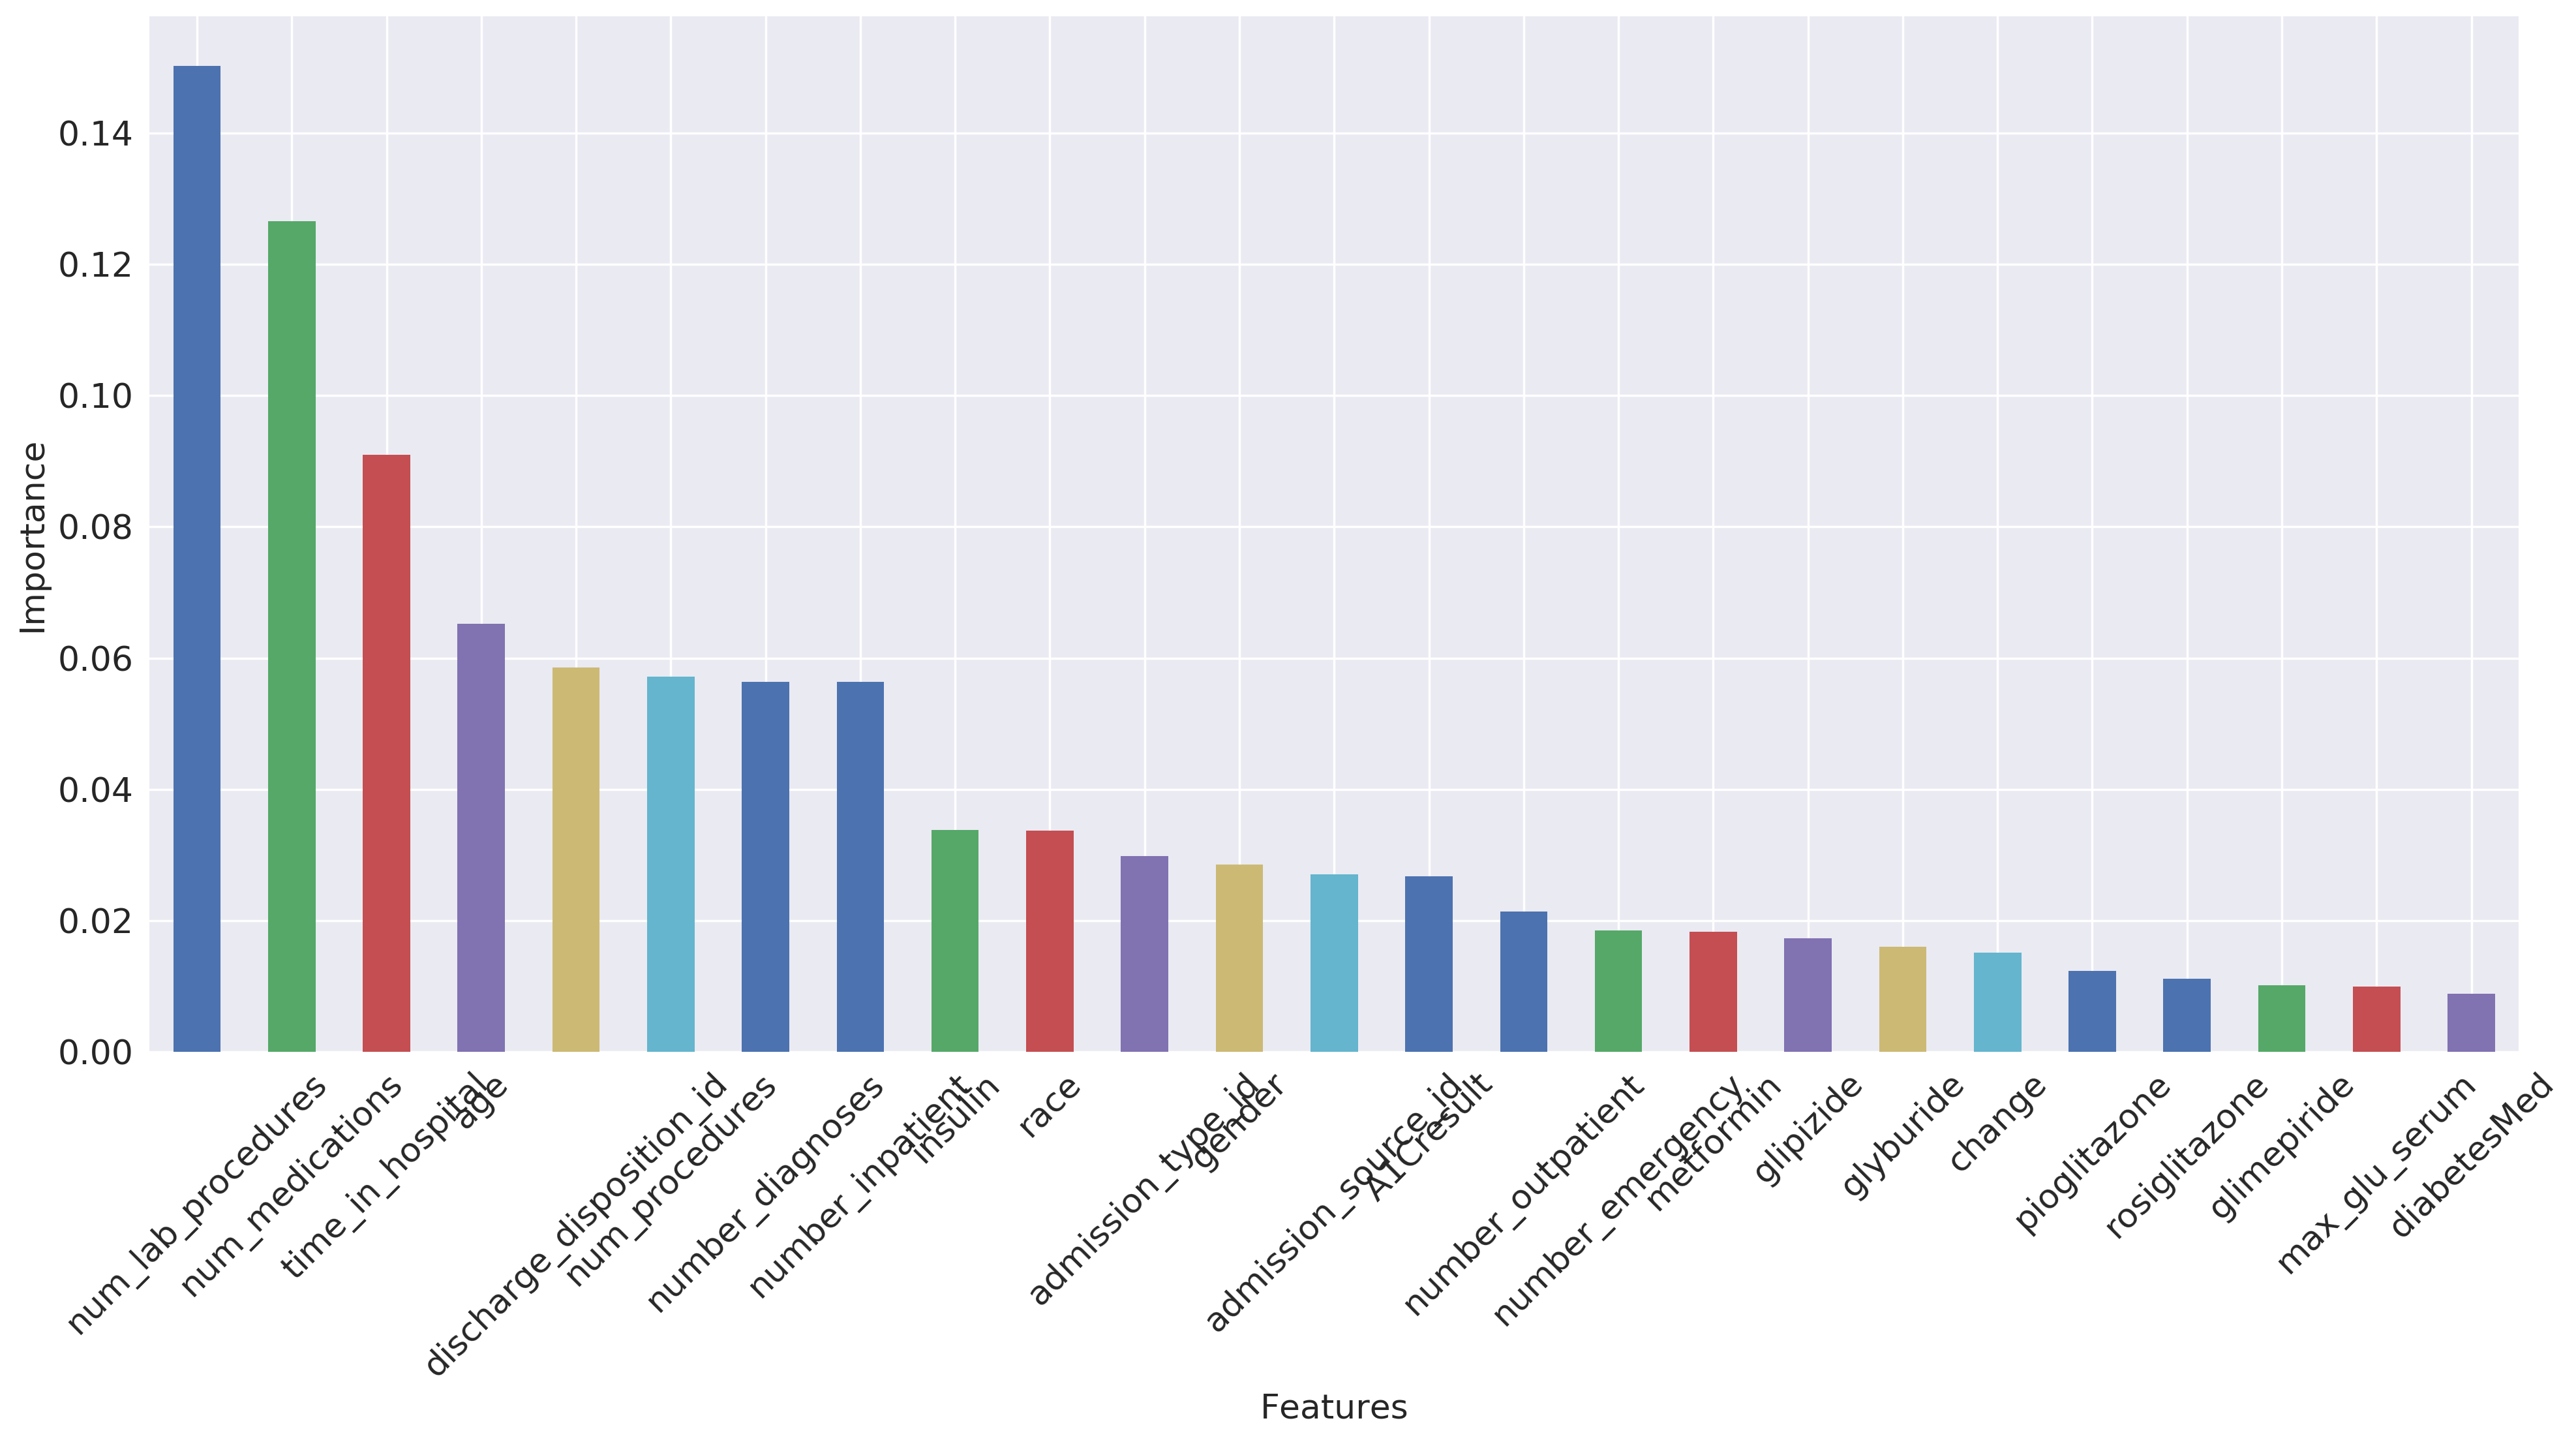


Model with Imputed Data

Precision= 0.603013429414
Recall= 0.603013429414
F_score= 0.603013429414


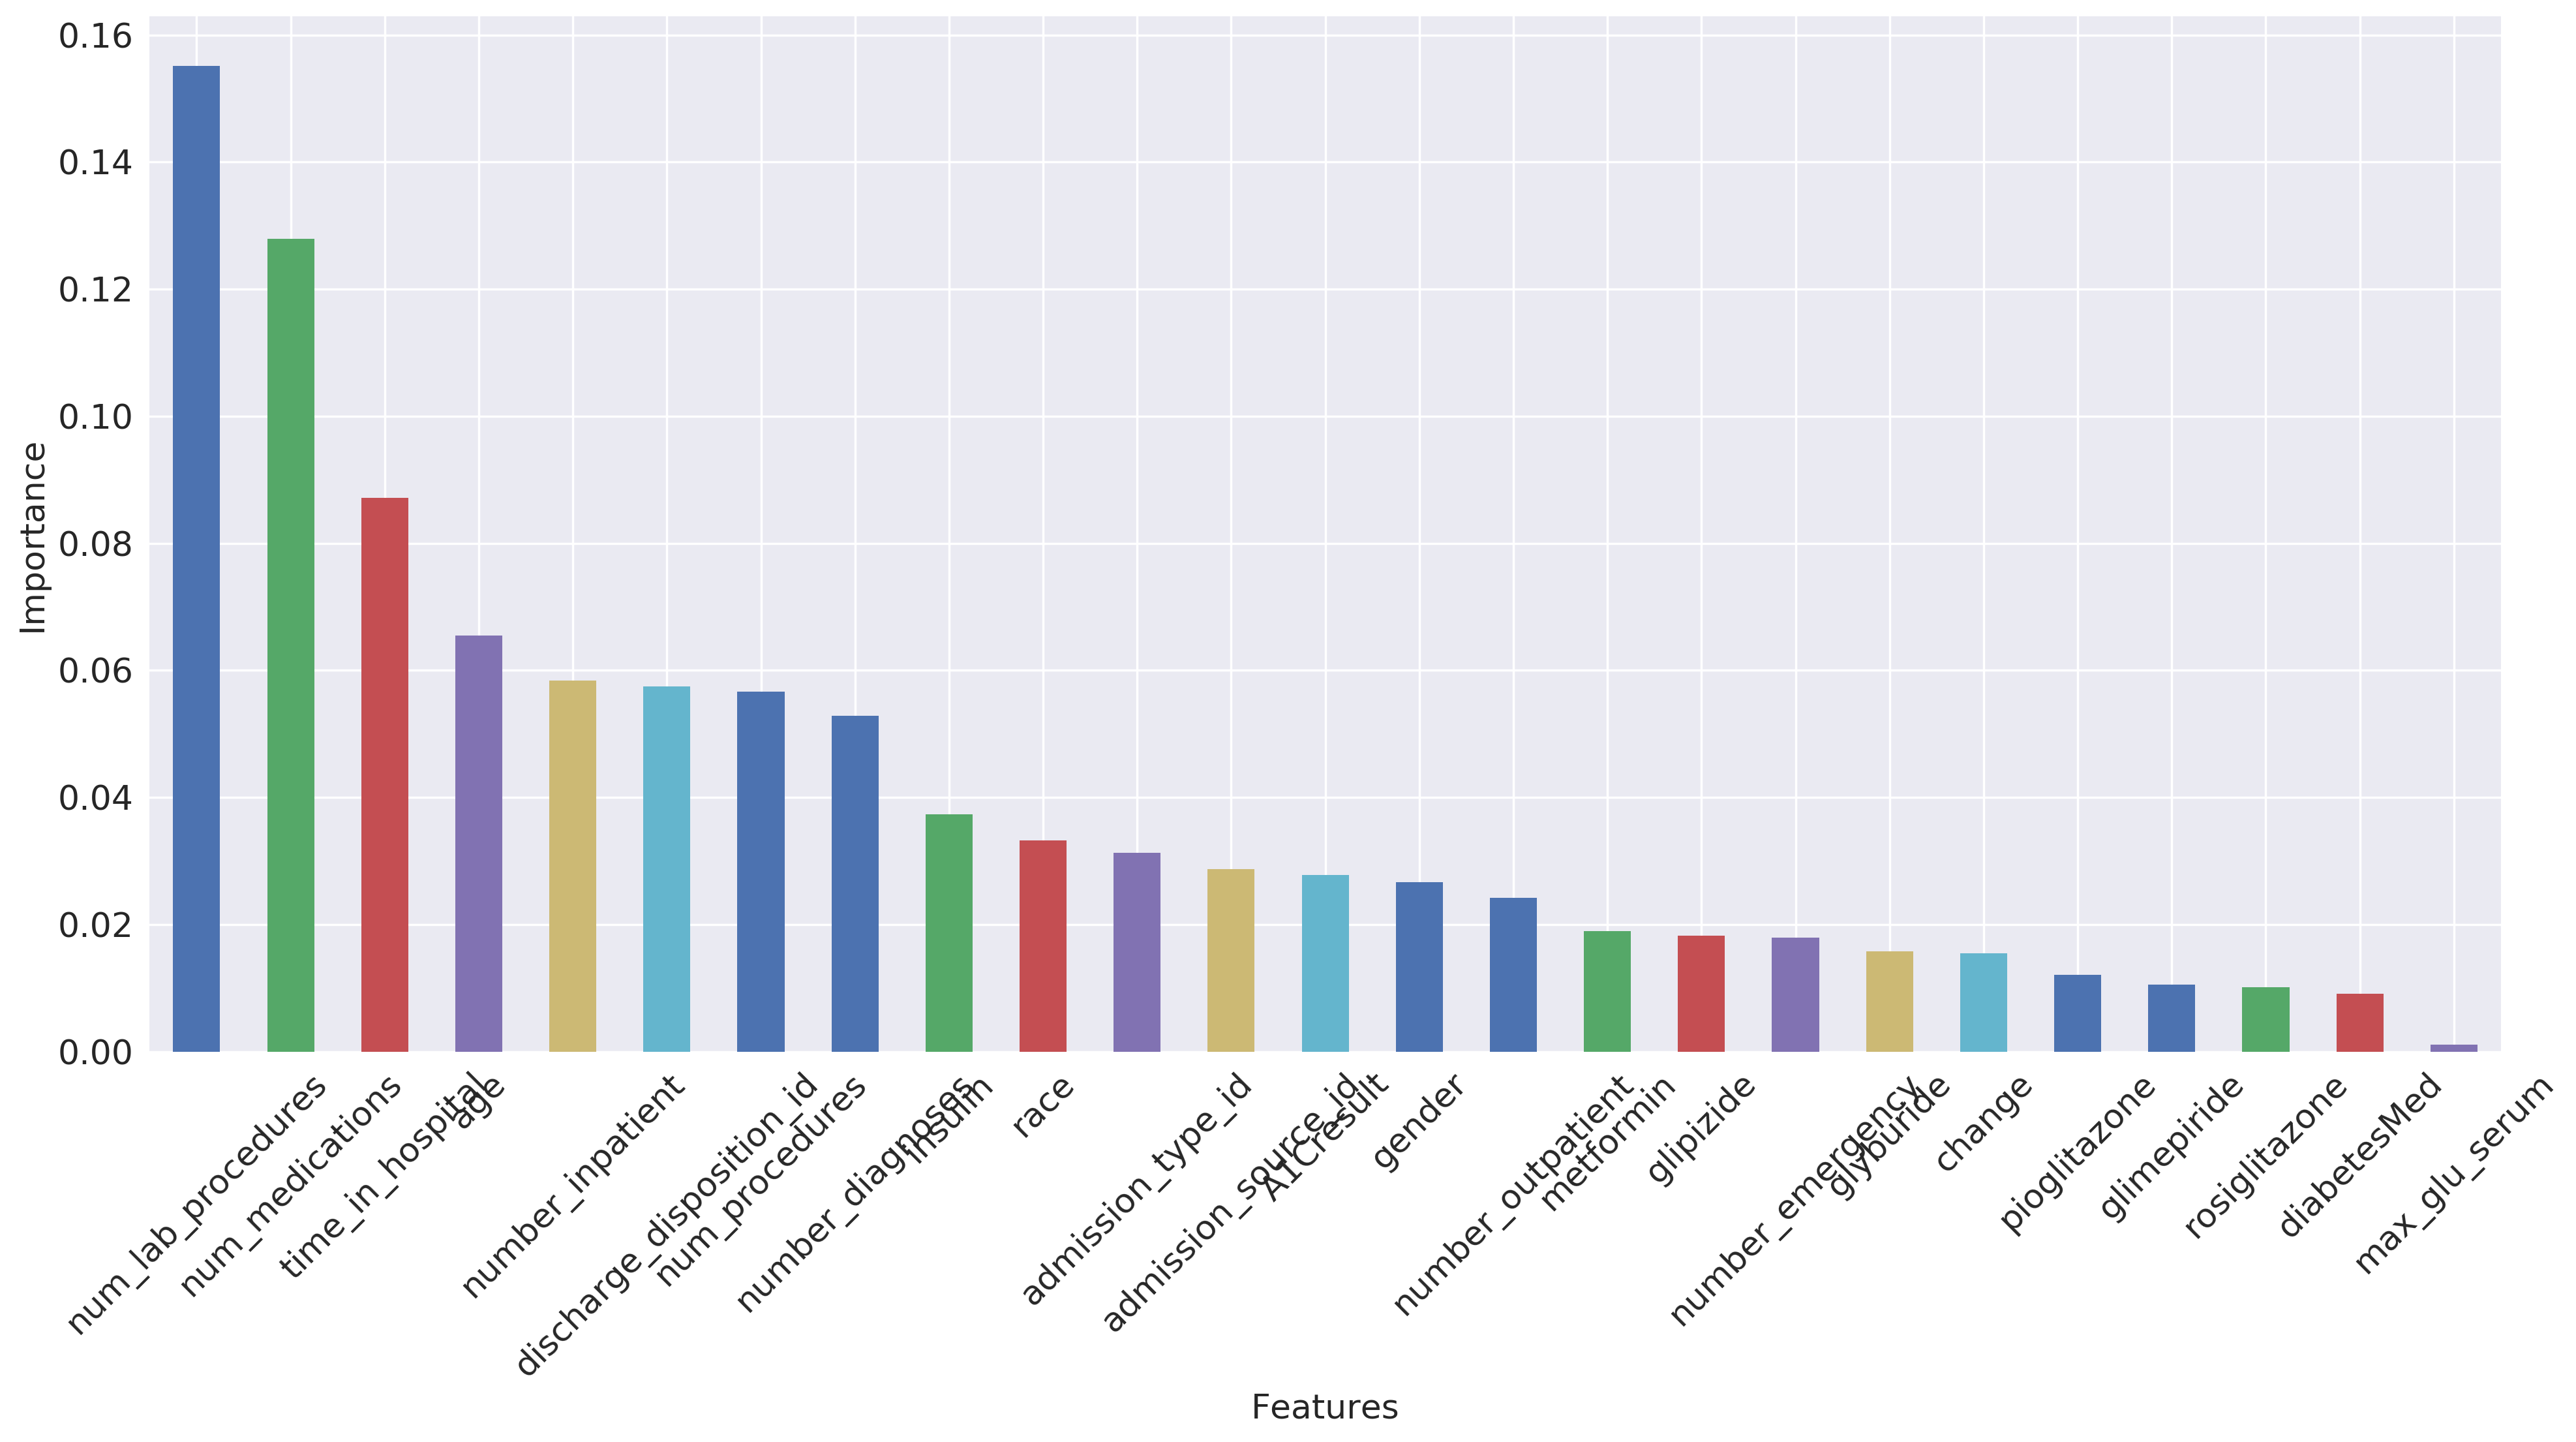


Model with rows having missing values removed

Precision= 0.605390875831
Recall= 0.605390875831
F_score= 0.605390875831


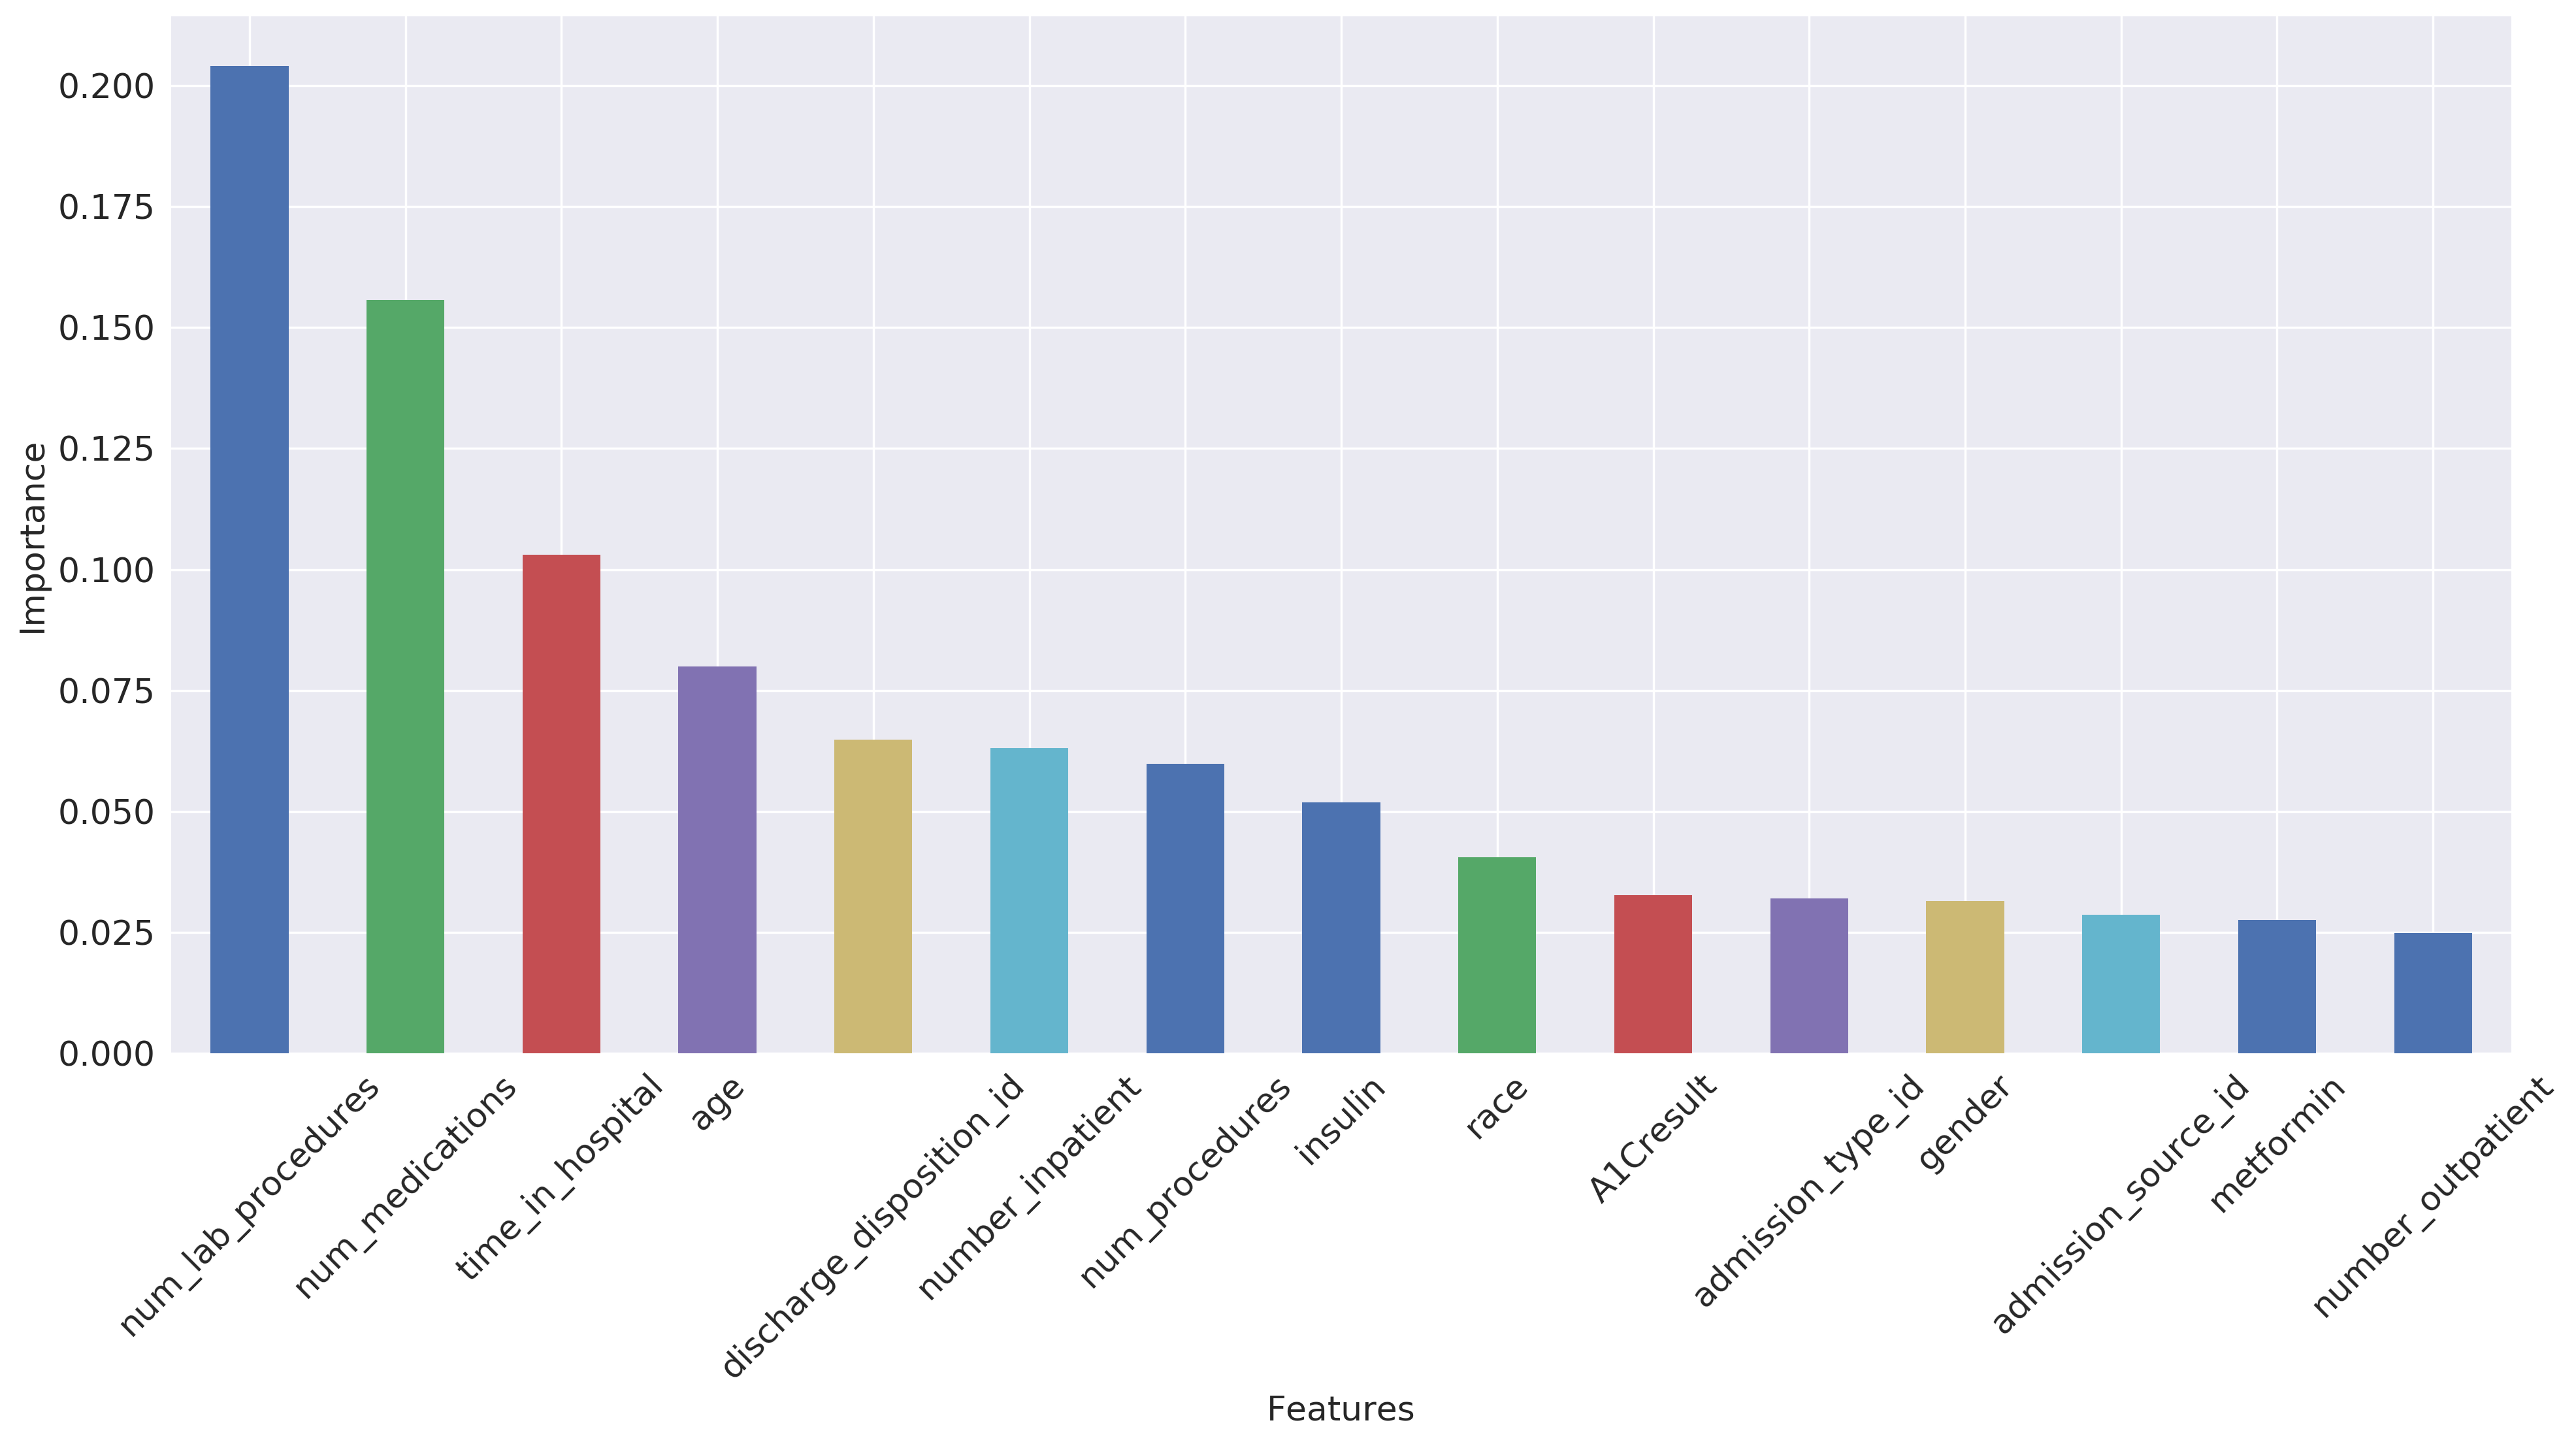


Model with important features

Precision= 0.596036685228
Recall= 0.596036685228
F_score= 0.596036685228


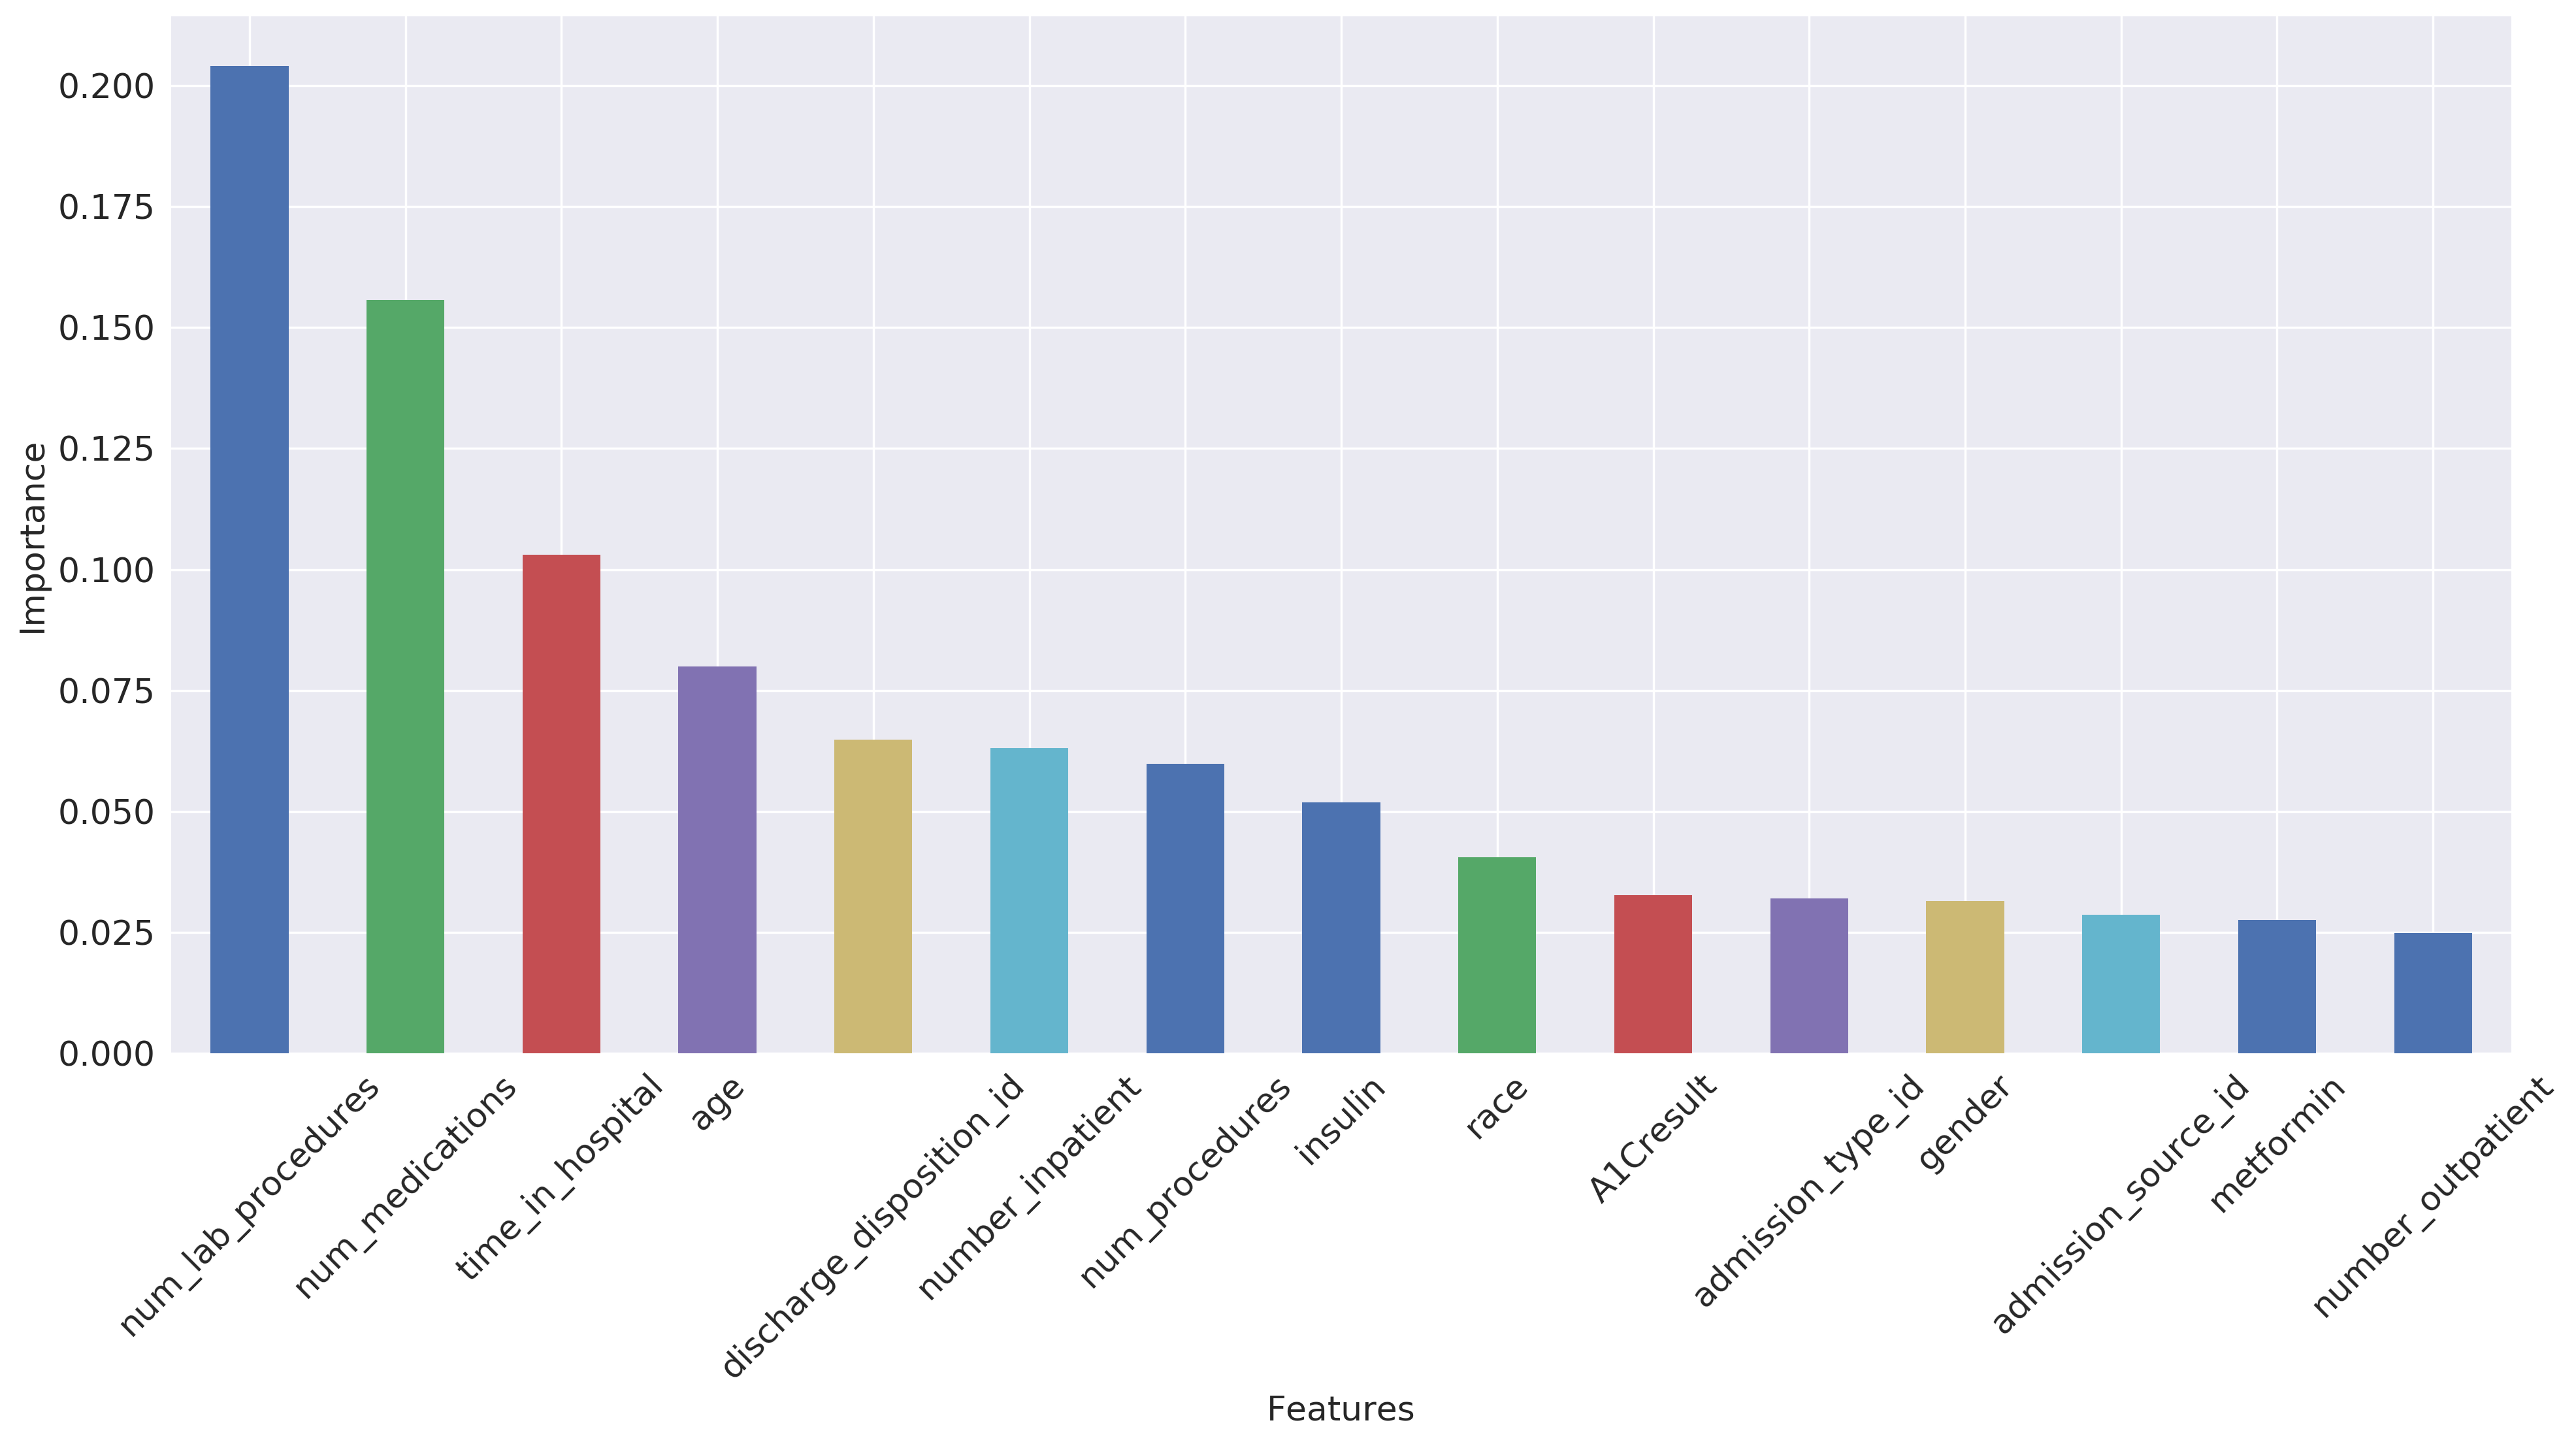


Model with important features with null rows removed

Precision= 0.596036685228
Recall= 0.596036685228
F_score= 0.596036685228


In [25]:
#importing RandomForestClassifier

model_accuray={"random":{},"logistic":{},"decision":{}}
#First creating a model with imputed Data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

#Function to create a random Forest model
def RForest(train_data,test_data,model_desc,model_num):
    # Random forest classifier
    rfc = RandomForestClassifier(random_state=0)
    # Train the model
    X_train=train_data.iloc[:,:-1].values
    y_train=train_data.iloc[:,-1].values
#     print(y_train)
    rfc.fit(X_train,y_train)
    # Get the feature importances
    importances = rfc.feature_importances_

    # Make the bar Plot from importances 
    # Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
    f_importances = pd.Series(importances,train_data.columns[:-1])
    # Sort the array in descending order of the importances
    f_importances.sort_values(ascending=False, inplace=True)
    plt.figure(figsize=(16,9),dpi=250)
    f_importances.plot(kind='bar', fontsize=15, rot=45)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Importance', fontsize=15)

    # Show the plot
    plt.tight_layout()
    plt.show()

    #testing the model
    X_test=test_data.iloc[:,:-1].values
    y_test=test_data.iloc[:,-1].values
#     print(y_test)
    precision,recall,f_score,support=precision_recall_fscore_support(y_test,rfc.predict(X_test),average='micro')
    print("\n"+model_desc+"\n")
    print("Precision=",precision)
    print("Recall=",recall)
    print("F_score=",f_score)
    model_accuray["random"][model_num]=f_score

######
#For Imputed Data
######
RForest(df_train_imputed[filtered_columns],df_test_imputed[filtered_columns],"Model with Imputed Data","M1")
#######
#For Non Imputed Data
#######
#Creating model without Data with removed rows
RForest(df_train_copy[filtered_columns],df_test_copy[filtered_columns],"Model with rows having missing values removed","M2")

##For only Important features
#Creating model without Data with removed rows
important_columns_model=['num_lab_procedures','num_medications','time_in_hospital','age','number_inpatient','discharge_disposition_id','num_procedures','insulin','race','admission_type_id','admission_source_id','A1Cresult','gender','number_outpatient','metformin',target_column]
RForest(df_train_imputed[important_columns_model],df_test_imputed[important_columns_model],"Model with important features","M3")

#Creating model with Data removed and only important columns
RForest(df_train_imputed[important_columns_model],df_test_imputed[important_columns_model],"Model with important features with null rows removed","M4")


# Implementing Decision Tree


/usr/local/lib/python3.5/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.5/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



Model with Imputed Data

Precision= 0.562659679004
Recall= 0.562659679004
F_score= 0.562659679004

Model with rows having missing values removed

Precision= 0.558650041066
Recall= 0.558650041066
F_score= 0.558650041066

Model with important features

Precision= 0.554536521454
Recall= 0.554536521454
F_score= 0.554536521454

Model with important features with null rows removed

Precision= 0.556372732024
Recall= 0.556372732024
F_score= 0.556372732024


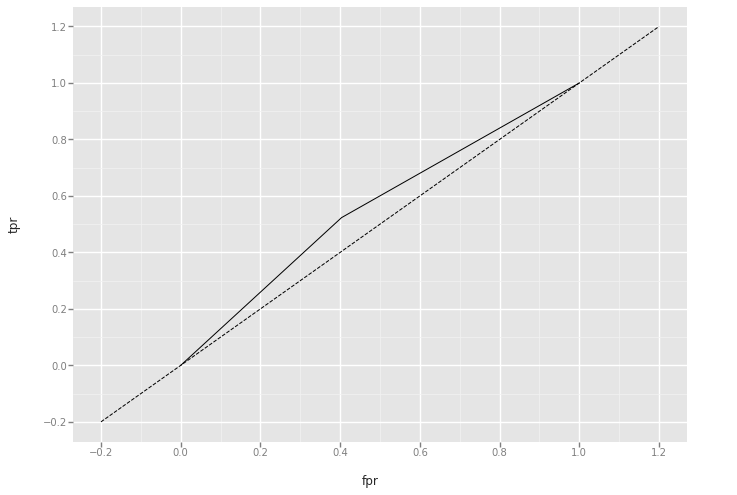

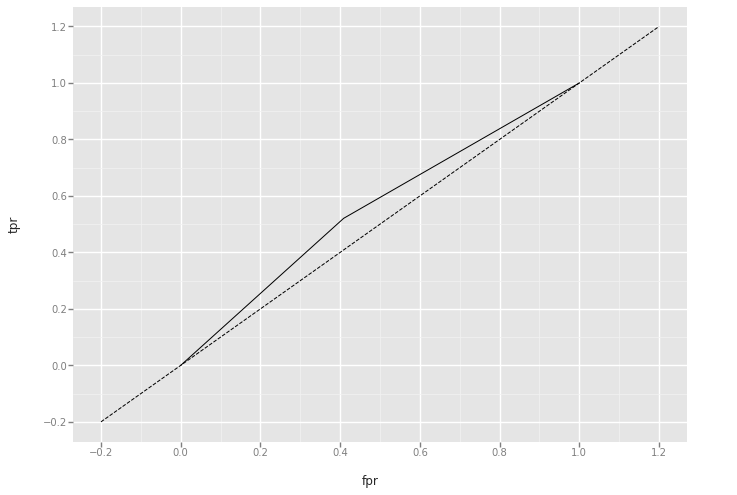

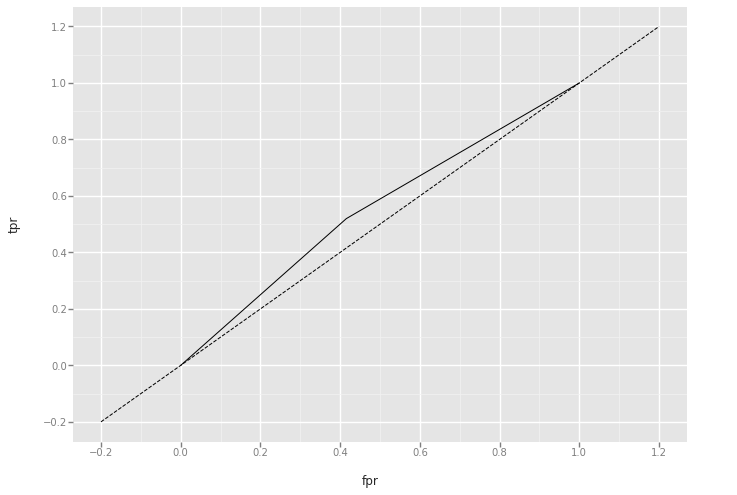

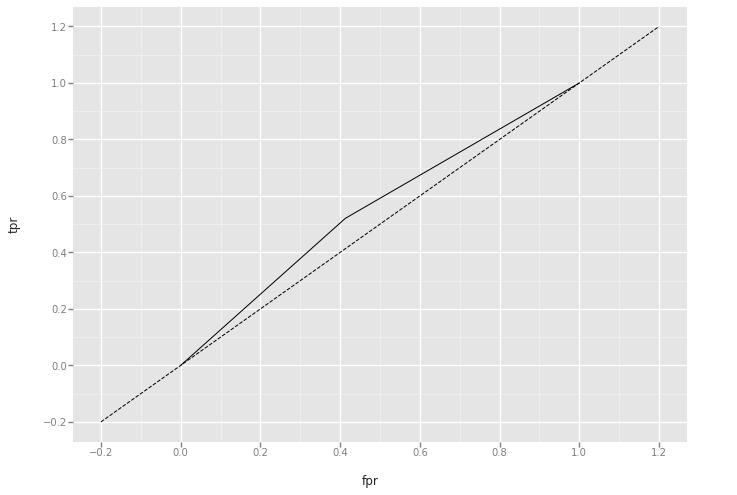

[<ggplot: (8766729206262)>,
 <ggplot: (-9223363270125567435)>,
 <ggplot: (-9223363270125567372)>,
 <ggplot: (8766729208503)>]

In [26]:
#importing DecisionTreeClassifier

#First creating a model with imputed Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
#creating ROC curve
from ggplot import *
plotlist = list()

def DTree(train_data,test_data,model_desc,model_num):
    
    # Random forest classifier
    dt = DecisionTreeClassifier(random_state=0)
    # Train the model
    X_train=train_data.iloc[:,:-1].values
    y_train=train_data.iloc[:,-1].values
    dt.fit(X_train,y_train)

    #testing the model
    X_test=test_data.iloc[:,:-1].values
    y_test=test_data.iloc[:,-1].values
    precision,recall,f_score,support=precision_recall_fscore_support(y_test,dt.predict(X_test),average='micro')
    print("\n"+model_desc+"\n")
    print("Precision=",precision)
    print("Recall=",recall)
    print("F_score=",f_score)
    model_accuray["decision"][model_num]=f_score

    preds = dt.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    p=ggplot(df, aes(x='fpr', y='tpr')) +\
        geom_line() +\
        geom_abline(linetype='dashed')
    plotlist.append(p)

######
#For Imputed Data
######
DTree(df_train_imputed,df_test_imputed,"Model with Imputed Data","M1")
#######
#For Non Imputed Data
#######
#Creating model without Data with removed rows
DTree(df_train_copy,df_test_copy,"Model with rows having missing values removed","M2")

##For only Important features
#Creating model without removed rows
DTree(df_train_imputed[important_columns_model],df_test_imputed[important_columns_model],"Model with important features","M3")
#Creating model, Data with removed rows with
DTree(df_train_copy[important_columns_model],df_test_copy[important_columns_model],"Model with important features with null rows removed","M4")

plotlist


# Implementing Logistic Regression

 


Model with Imputed Data

Precision= 0.616737635113
Recall= 0.616737635113
F_score= 0.616737635113

Model with rows having missing values removed

Precision= 0.619540058239
Recall= 0.619540058239
F_score= 0.619540058239

Model with important features

Precision= 0.611562397642
Recall= 0.611562397642
F_score= 0.611562397642

Model with important features with null rows removed

Precision= 0.615956096468
Recall= 0.615956096468
F_score= 0.615956096468


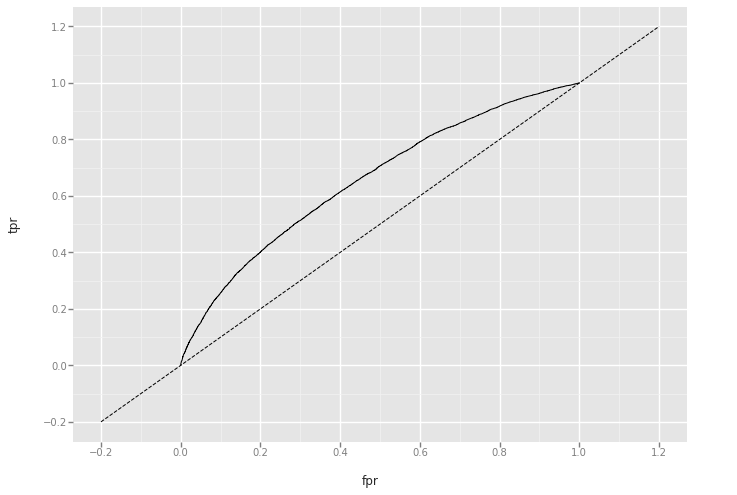

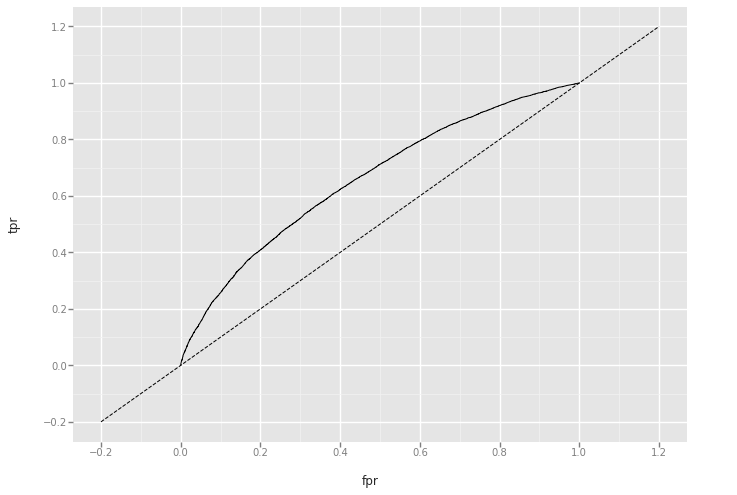

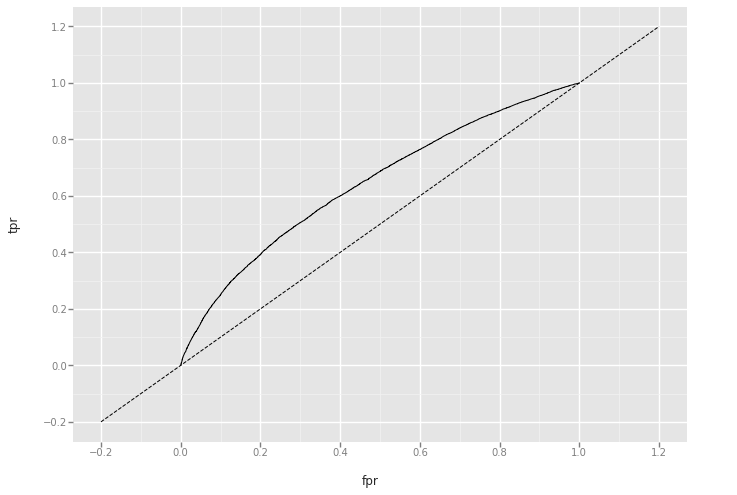

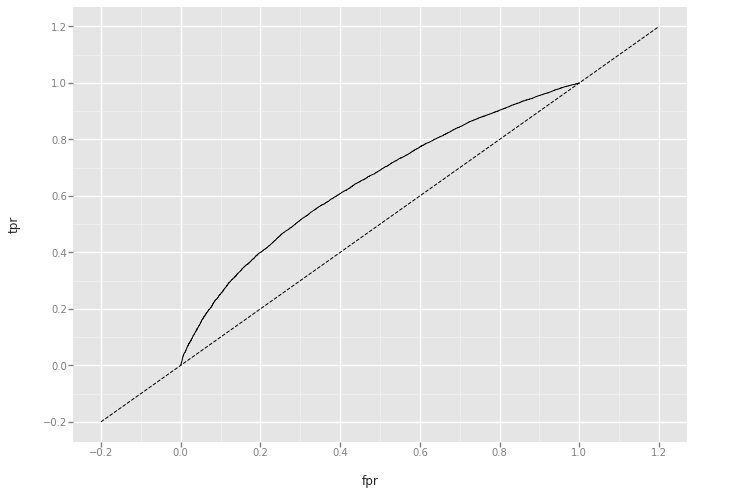

[<ggplot: (-9223363270125962310)>,
 <ggplot: (8766728784718)>,
 <ggplot: (8766728784781)>,
 <ggplot: (-9223363270125990961)>]

In [27]:
#implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
plotlist=[]
def LRegression(train_data,test_data,model_desc,model_num):
    lr = LogisticRegression(C=100.0, random_state=0)
    # Train the model
    X_train=train_data.iloc[:,:-1].values
    y_train=train_data.iloc[:,-1].values
    lr.fit(X_train,y_train)

    #testing the model
    X_test=test_data.iloc[:,:-1].values
    y_test=test_data.iloc[:,-1].values
    precision,recall,f_score,support=precision_recall_fscore_support(y_test,lr.predict(X_test),average='micro')
    print("\n"+model_desc+"\n")
    print("Precision=",precision)
    print("Recall=",recall)
    print("F_score=",f_score)
    model_accuray["logistic"][model_num]=f_score
    
    preds = lr.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    p=ggplot(df, aes(x='fpr', y='tpr')) +\
        geom_line() +\
        geom_abline(linetype='dashed')
    plotlist.append(p)
######
#For Imputed Data
######
LRegression(df_train_imputed,df_test_imputed,"Model with Imputed Data","M1")
#######
#For Non Imputed Data
#######
#Creating model without Data with removed rows
LRegression(df_train_copy,df_test_copy,"Model with rows having missing values removed","M2")

##For only Important features
#Creating model,Data with removed rows
LRegression(df_train_imputed[important_columns_model],df_test_imputed[important_columns_model],"Model with important features","M3")

##Creating model, Data with removed rows using only important features
LRegression(df_train_copy[important_columns_model],df_test_copy[important_columns_model],"Model with important features with null rows removed","M4")
plotlist



# Comparing Fscore of different algorithms


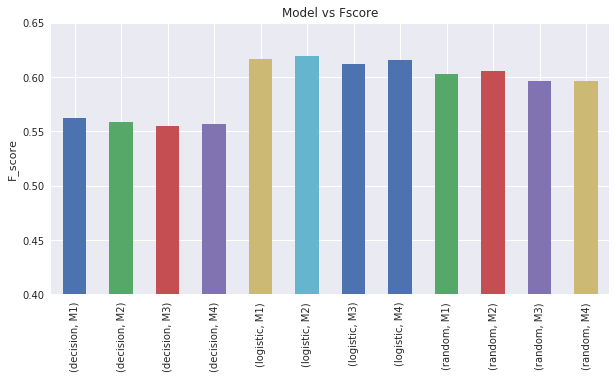

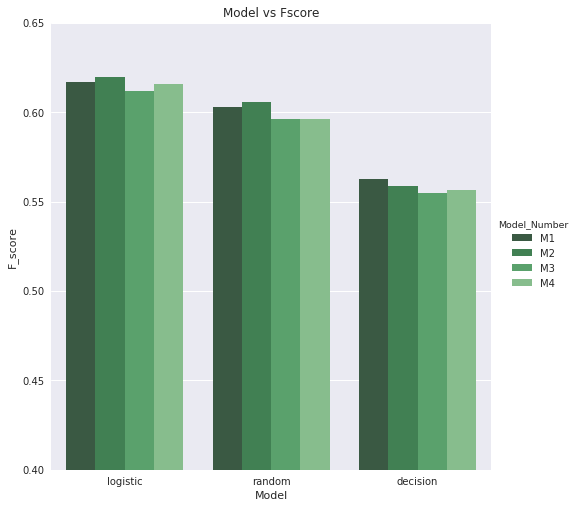

In [28]:
#Comparing the F_Score
model_accuray
accuracy_dataframe=pd.DataFrame(model_accuray)
plt.figure(figsize=(10,5))
plt.ylim(0.40,.65)
accuracy_dataframe.unstack().plot(kind="bar",title= "Model vs Fscore")
plt.ylabel("F_score")
plt.show()
#changing dataframe
accuracy_dataframe['Model_Number'] = accuracy_dataframe.index
accuracy_dataframe_melted=pd.melt(accuracy_dataframe, id_vars=['Model_Number'], value_vars=['logistic','random','decision'],var_name="Model",value_name='F_score')
lm=sns.factorplot(x="Model", y="F_score", hue="Model_Number", data=accuracy_dataframe_melted, kind="bar",size=7,palette="Greens_d")
axes = lm.axes
axes[0,0].set_ylim(0.40,0.65)
axes[0,0].set_title("Model vs Fscore")
plt.show()


# exit